In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime

In [4]:
df=pd.read_csv("data/2019.csv",encoding='CP949')
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


In [5]:
df.columns = ['datetime', 'exp', 'mcode', 'pcode', 'name', 'type', 'price', 'amount']
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


In [6]:
df["exp"]=df["exp"].fillna(method='ffill')
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


In [7]:
dfformless = df[df['type'] == "무형"]
dfformless

,datetime,exp,mcode,pcode,name,type,price,amount
2318,2019-01-25 19:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN
2845,2019-01-31 18:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN
3332,2019-02-05 18:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN
6570,2019-03-09 0:00,20.0,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,-,NaN
6571,2019-03-09 0:20,20.0,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,-,NaN
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


In [8]:
idx_fl = df[df['type'] == "무형"].index
df = df.drop(idx_fl)
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000"
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000"
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000"
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000"


In [9]:
# 판매단가 및 취급액 데이터 앞뒤공백제거
df['price']  = df['price'].str.strip()
df['amount']  = df['amount'].str.strip()
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000"
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000"
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000"
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000"


In [10]:
df['price']  = df['price'].str.replace(",","")
df['amount']  = df['amount'].str.replace(",","")
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000


In [11]:
df[['price','amount']] = df[['price','amount']].apply(pd.to_numeric)
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000


In [12]:
#방송일시를 datetime object 로 변경
df['datetime'] = df['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M'))
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000


In [13]:
df['sale'] = df['amount']/df['price']
df

,datetime,exp,mcode,pcode,name,type,price,amount,sale
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167.218045
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,68.628378
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,286.117978
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,621.380952
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,87.120253


In [14]:
df.isnull().sum() # 바뀐데이터 결측값

datetime    0
exp         0
mcode       0
pcode       0
name        0
type        0
price       0
amount      0
sale        0
dtype: int64

In [15]:
df=df.dropna(axis=0) #바뀐데이터 결측값 제거
df

,datetime,exp,mcode,pcode,name,type,price,amount,sale
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167.218045
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,68.628378
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,286.117978
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,621.380952
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,87.120253


In [16]:
df.isnull().sum()

datetime    0
exp         0
mcode       0
pcode       0
name        0
type        0
price       0
amount      0
sale        0
dtype: int64

In [17]:
# 방송일시(기준열), 노출시간, 마더코드, 상품군 (기준에 따라 합쳐질 때 변하지 않아야 할 열) 추출 
df_sample = df[['datetime','exp','mcode','type']]
df_sample

,datetime,exp,mcode,type
0,2019-01-01 06:00:00,20.0,100346,의류
1,2019-01-01 06:00:00,20.0,100346,의류
2,2019-01-01 06:20:00,20.0,100346,의류
3,2019-01-01 06:20:00,20.0,100346,의류
4,2019-01-01 06:40:00,20.0,100346,의류
...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,주방
38300,2020-01-01 00:00:00,20.0,100448,주방
38301,2020-01-01 00:00:00,20.0,100448,주방
38302,2020-01-01 00:00:00,20.0,100448,주방


In [18]:
df.groupby('datetime').price.mean()

datetime
2019-01-01 06:00:00      39900.0
2019-01-01 06:20:00      39900.0
2019-01-01 06:40:00      39900.0
2019-01-01 07:00:00      59000.0
2019-01-01 07:20:00      59000.0
                         ...    
2019-12-31 21:40:00    1429000.0
2019-12-31 22:00:00    1429000.0
2019-12-31 23:20:00     163000.0
2019-12-31 23:40:00     163000.0
2020-01-01 00:00:00     163000.0
Name: price, Length: 20588, dtype: float64

In [19]:
ddfs=df.groupby('datetime')['amount','sale'].sum().reset_index(level='datetime') #방송일시별로 모든 연속형 변수 합함.
ddfm=df.groupby('datetime').price.mean().reset_index(level='datetime')
ddf = pd.merge(ddfs,ddfm)
ddf
#ddf2=ddf.reset_index(level='datetime') # 방송일시별 취급액, 판매수량의 합, 방송일시(index)를 column으로 변환
#ddf2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,datetime,amount,sale,price
0,2019-01-01 06:00:00,6470000,162.155388,39900.0
1,2019-01-01 06:20:00,10217000,256.065163,39900.0
2,2019-01-01 06:40:00,16009000,401.228070,39900.0
3,2019-01-01 07:00:00,6819000,115.576271,59000.0
4,2019-01-01 07:20:00,15689000,265.915254,59000.0
...,...,...,...,...
20583,2019-12-31 21:40:00,67810000,48.240053,1429000.0
20584,2019-12-31 22:00:00,104917000,74.989813,1429000.0
20585,2019-12-31 23:20:00,15986000,95.197591,163000.0
20586,2019-12-31 23:40:00,36916000,225.725718,163000.0


In [20]:
# datetime별로 중복되는 행의 취급액과 판매수량이 합쳐졌지만, 중복되는 결과 나타남.
ddf2 = pd.merge(df_sample,ddf)
ddf2

,datetime,exp,mcode,type,amount,sale,price
0,2019-01-01 06:00:00,20.0,100346,의류,6470000,162.155388,39900.0
1,2019-01-01 06:00:00,20.0,100346,의류,6470000,162.155388,39900.0
2,2019-01-01 06:20:00,20.0,100346,의류,10217000,256.065163,39900.0
3,2019-01-01 06:20:00,20.0,100346,의류,10217000,256.065163,39900.0
4,2019-01-01 06:40:00,20.0,100346,의류,16009000,401.228070,39900.0
...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,주방,36916000,225.725718,163000.0
37368,2020-01-01 00:00:00,20.0,100448,주방,215694000,1309.538102,163000.0
37369,2020-01-01 00:00:00,20.0,100448,주방,215694000,1309.538102,163000.0
37370,2020-01-01 00:00:00,20.0,100448,주방,215694000,1309.538102,163000.0


In [21]:
# datetime을 기준으로 중복되는 행 제거.
ddf3=ddf2.drop_duplicates(['datetime'])
ddf3

,datetime,exp,mcode,type,amount,sale,price
0,2019-01-01 06:00:00,20.0,100346,의류,6470000,162.155388,39900.0
2,2019-01-01 06:20:00,20.0,100346,의류,10217000,256.065163,39900.0
4,2019-01-01 06:40:00,20.0,100346,의류,16009000,401.228070,39900.0
6,2019-01-01 07:00:00,20.0,100305,속옷,6819000,115.576271,59000.0
7,2019-01-01 07:20:00,20.0,100305,속옷,15689000,265.915254,59000.0
...,...,...,...,...,...,...,...
37356,2019-12-31 21:40:00,20.0,100155,가전,67810000,48.240053,1429000.0
37358,2019-12-31 22:00:00,20.0,100155,가전,104917000,74.989813,1429000.0
37360,2019-12-31 23:20:00,20.0,100448,주방,15986000,95.197591,163000.0
37364,2019-12-31 23:40:00,20.0,100448,주방,36916000,225.725718,163000.0


In [22]:
#시간 제외 데이터 추출하여 'date'변수로 할당
ddf3['date'] = ddf3['datetime'].dt.strftime('%Y%m%d%H')
ddf3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,exp,mcode,type,amount,sale,price,date
0,2019-01-01 06:00:00,20.0,100346,의류,6470000,162.155388,39900.0,2019010106
2,2019-01-01 06:20:00,20.0,100346,의류,10217000,256.065163,39900.0,2019010106
4,2019-01-01 06:40:00,20.0,100346,의류,16009000,401.228070,39900.0,2019010106
6,2019-01-01 07:00:00,20.0,100305,속옷,6819000,115.576271,59000.0,2019010107
7,2019-01-01 07:20:00,20.0,100305,속옷,15689000,265.915254,59000.0,2019010107
...,...,...,...,...,...,...,...,...
37356,2019-12-31 21:40:00,20.0,100155,가전,67810000,48.240053,1429000.0,2019123121
37358,2019-12-31 22:00:00,20.0,100155,가전,104917000,74.989813,1429000.0,2019123122
37360,2019-12-31 23:20:00,20.0,100448,주방,15986000,95.197591,163000.0,2019123123
37364,2019-12-31 23:40:00,20.0,100448,주방,36916000,225.725718,163000.0,2019123123


In [23]:
# 마더코드와 날짜, 가격에 따른 노출시간, 취급액, 판매수량의 합
mdf=ddf3.groupby(['date','mcode','type','price'])['exp','amount','sale'].sum()
mdf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


exp     amount         sale
date       mcode  type price                                  
2019010106 100346 의류   39900.0    60.0   32696000   819.448622
2019010107 100305 속옷   59000.0    60.0   47878000   811.491525
2019010108 100808 의류   59900.0    60.0   99736000  1665.041736
2019010109 100816 의류   79000.0    60.0   90973000  1151.556962
2019010110 100809 의류   79900.0    60.0  259678000  3250.037547
...                                ...        ...          ...
2019123121 100155 가전   1429000.0  40.0  117105000    83.127989
           100501 생활용품 333500.0   20.0  102836000   412.958864
2019123122 100155 가전   1429000.0  20.0  104917000    74.989813
2019123123 100448 주방   163000.0   40.0   52902000   320.923309
2020010100 100448 주방   163000.0   20.0  215694000  1309.538102

[8226 rows x 3 columns]

In [24]:
# index를 column으로 바꾸기
mdf2=mdf.reset_index(level=['date', 'mcode','type','price'])
mdf2

,date,mcode,type,price,exp,amount,sale
0,2019010106,100346,의류,39900.0,60.0,32696000,819.448622
1,2019010107,100305,속옷,59000.0,60.0,47878000,811.491525
2,2019010108,100808,의류,59900.0,60.0,99736000,1665.041736
3,2019010109,100816,의류,79000.0,60.0,90973000,1151.556962
4,2019010110,100809,의류,79900.0,60.0,259678000,3250.037547
...,...,...,...,...,...,...,...
8221,2019123121,100155,가전,1429000.0,40.0,117105000,83.127989
8222,2019123121,100501,생활용품,333500.0,20.0,102836000,412.958864
8223,2019123122,100155,가전,1429000.0,20.0,104917000,74.989813
8224,2019123123,100448,주방,163000.0,40.0,52902000,320.923309


In [25]:
# 위의 데이터는 방송일자만 고려함. 방송시간또한 고려해야하므로 datetime변수를 위 데이터와 merge해야함.
# 마더코드, date, 판매단가를 고려하여 방송일시 열을 합쳐야 함 - 세가지중 하나라도 빠지면 취급액과 판매수량이 달라짐.
ddf4=ddf3[['datetime','mcode','date','price']]
ddf4

,datetime,mcode,date,price
0,2019-01-01 06:00:00,100346,2019010106,39900.0
2,2019-01-01 06:20:00,100346,2019010106,39900.0
4,2019-01-01 06:40:00,100346,2019010106,39900.0
6,2019-01-01 07:00:00,100305,2019010107,59000.0
7,2019-01-01 07:20:00,100305,2019010107,59000.0
...,...,...,...,...
37356,2019-12-31 21:40:00,100155,2019123121,1429000.0
37358,2019-12-31 22:00:00,100155,2019123122,1429000.0
37360,2019-12-31 23:20:00,100448,2019123123,163000.0
37364,2019-12-31 23:40:00,100448,2019123123,163000.0


In [26]:
# 중복열을 기준으로 merge
ddf5 = pd.merge(ddf4,mdf2)
ddf5

,datetime,mcode,date,price,type,exp,amount,sale
0,2019-01-01 06:00:00,100346,2019010106,39900.0,의류,60.0,32696000,819.448622
1,2019-01-01 06:20:00,100346,2019010106,39900.0,의류,60.0,32696000,819.448622
2,2019-01-01 06:40:00,100346,2019010106,39900.0,의류,60.0,32696000,819.448622
3,2019-01-01 07:00:00,100305,2019010107,59000.0,속옷,60.0,47878000,811.491525
4,2019-01-01 07:20:00,100305,2019010107,59000.0,속옷,60.0,47878000,811.491525
...,...,...,...,...,...,...,...,...
20583,2019-12-31 21:40:00,100155,2019123121,1429000.0,가전,40.0,117105000,83.127989
20584,2019-12-31 22:00:00,100155,2019123122,1429000.0,가전,20.0,104917000,74.989813
20585,2019-12-31 23:20:00,100448,2019123123,163000.0,주방,40.0,52902000,320.923309
20586,2019-12-31 23:40:00,100448,2019123123,163000.0,주방,40.0,52902000,320.923309


In [27]:
# 마더코드, date, 판매단가가 중복되는 행만 제거하고 첫번째 행만 남게 함.
ddf6=ddf5.drop_duplicates(['mcode','date','price'])
ddf6

,datetime,mcode,date,price,type,exp,amount,sale
0,2019-01-01 06:00:00,100346,2019010106,39900.0,의류,60.0,32696000,819.448622
3,2019-01-01 07:00:00,100305,2019010107,59000.0,속옷,60.0,47878000,811.491525
6,2019-01-01 08:00:00,100808,2019010108,59900.0,의류,60.0,99736000,1665.041736
9,2019-01-01 09:00:00,100816,2019010109,79000.0,의류,60.0,90973000,1151.556962
12,2019-01-01 10:00:00,100809,2019010110,79900.0,의류,60.0,259678000,3250.037547
...,...,...,...,...,...,...,...,...
20581,2019-12-31 21:00:00,100501,2019123121,333500.0,생활용품,20.0,102836000,412.958864
20582,2019-12-31 21:20:00,100155,2019123121,1429000.0,가전,40.0,117105000,83.127989
20584,2019-12-31 22:00:00,100155,2019123122,1429000.0,가전,20.0,104917000,74.989813
20585,2019-12-31 23:20:00,100448,2019123123,163000.0,주방,40.0,52902000,320.923309


In [28]:
#이제 쓸모없어진 date열 제거
del ddf6['date']

In [29]:
# 원래대로 열 재배치
ddf6 = ddf6[['datetime', 'exp', 'mcode', 'type', 'price', 'amount', 'sale']]
ddf6

,datetime,exp,mcode,type,price,amount,sale
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622
3,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525
6,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736
9,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962
12,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547
...,...,...,...,...,...,...,...
20581,2019-12-31 21:00:00,20.0,100501,생활용품,333500.0,102836000,412.958864
20582,2019-12-31 21:20:00,40.0,100155,가전,1429000.0,117105000,83.127989
20584,2019-12-31 22:00:00,20.0,100155,가전,1429000.0,104917000,74.989813
20585,2019-12-31 23:20:00,40.0,100448,주방,163000.0,52902000,320.923309


In [30]:
for i in range(1,len(ddf6)):
    if ddf6['mcode'].iloc[i] == ddf6['mcode'].iloc[i-1] :
        ddf6['exp'].iloc[i-1] = ddf6['exp'].iloc[i-1] + ddf6['exp'].iloc[i]
        ddf6['amount'].iloc[i-1] = ddf6['amount'].iloc[i-1] + ddf6['amount'].iloc[i]
        ddf6['sale'].iloc[i-1] = ddf6['sale'].iloc[i-1] + ddf6['sale'].iloc[i]
ddf6

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,datetime,exp,mcode,type,price,amount,sale
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622
3,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525
6,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736
9,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962
12,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547
...,...,...,...,...,...,...,...
20581,2019-12-31 21:00:00,20.0,100501,생활용품,333500.0,102836000,412.958864
20582,2019-12-31 21:20:00,60.0,100155,가전,1429000.0,222022000,158.117802
20584,2019-12-31 22:00:00,20.0,100155,가전,1429000.0,104917000,74.989813
20585,2019-12-31 23:20:00,60.0,100448,주방,163000.0,268596000,1630.461411


In [31]:
ddf7=ddf6.drop(ddf6[ddf6['mcode'] == ddf6['mcode'].shift(1)].index)
ddf7

,datetime,exp,mcode,type,price,amount,sale
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622
3,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525
6,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736
9,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962
12,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547
...,...,...,...,...,...,...,...
20573,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000,2548.379747
20576,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000,155.702800
20579,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000,761.891640
20582,2019-12-31 21:20:00,60.0,100155,가전,1429000.0,222022000,158.117802


In [32]:
ddf7.set_index(ddf7['datetime'], inplace=True)
ddf7

,datetime,exp,mcode,type,price,amount,sale
datetime,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547
...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000,2548.379747
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000,155.702800
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000,761.891640


In [33]:
# 시간별 판매수량의 합
ddf7.sale.resample('H').sum()

datetime
2019-01-01 06:00:00     819.448622
2019-01-01 07:00:00     811.491525
2019-01-01 08:00:00    1665.041736
2019-01-01 09:00:00    1151.556962
2019-01-01 10:00:00    3250.037547
                          ...     
2019-12-31 19:00:00     155.702800
2019-12-31 20:00:00     761.891640
2019-12-31 21:00:00     158.117802
2019-12-31 22:00:00       0.000000
2019-12-31 23:00:00    1630.461411
Freq: H, Name: sale, Length: 8754, dtype: float64

In [34]:
#시간별 판매수량
ddf7_1=ddf7.sale.resample('H').sum()
DataFrame(ddf7_1)

,sale
datetime,
2019-01-01 06:00:00,819.448622
2019-01-01 07:00:00,811.491525
2019-01-01 08:00:00,1665.041736
2019-01-01 09:00:00,1151.556962
2019-01-01 10:00:00,3250.037547
...,...
2019-12-31 19:00:00,155.702800
2019-12-31 20:00:00,761.891640
2019-12-31 21:00:00,158.117802


In [35]:
#월별 판매수량
ddf7_2=ddf7.sale.resample('1M').sum()
ddf7_2=DataFrame(ddf7_2)

ddf7_2

,sale
datetime,
2019-01-31,9.433661e+05
2019-02-28,7.504978e+05
2019-03-31,8.162068e+05
2019-04-30,7.594955e+05
2019-05-31,8.702882e+05
2019-06-30,8.745679e+05
2019-07-31,9.572839e+05
2019-08-31,1.065465e+06
2019-09-30,9.480336e+05


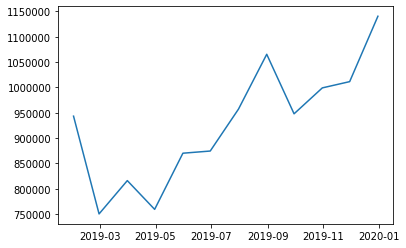

In [36]:
#월별 판매수량 그래프
plt.plot(ddf7_2)

In [37]:
ddf7_2.sort_values(by='sale',ascending=False)

,sale
datetime,
2019-12-31,1.140536e+06
2019-08-31,1.065465e+06
2019-11-30,1.011507e+06
2019-10-31,9.991663e+05
2019-07-31,9.572839e+05
2019-09-30,9.480336e+05
2019-01-31,9.433661e+05
2019-06-30,8.745679e+05
2019-05-31,8.702882e+05


In [38]:
#상품군별 판매수량
q=ddf7['sale'].groupby(ddf7['type']).sum()

DataFrame(q)

,sale
type,
가구,4.542997e+04
가전,1.001908e+05
건강기능,2.944640e+05
농수축,3.776003e+06
생활용품,5.015015e+05
속옷,1.425044e+06
의류,1.666378e+06
이미용,1.046214e+06
잡화,9.252257e+05


In [39]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [40]:
q=DataFrame(q)
q=q.reset_index()
q.sale

0     4.542997e+04
1     1.001908e+05
2     2.944640e+05
3     3.776003e+06
4     5.015015e+05
5     1.425044e+06
6     1.666378e+06
7     1.046214e+06
8     9.252257e+05
9     1.252997e+06
10    1.029647e+05
Name: sale, dtype: float64

In [41]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

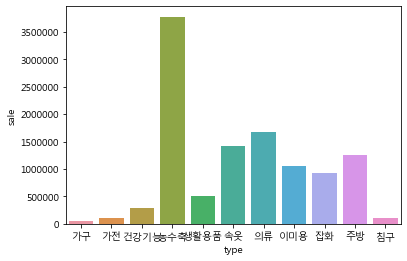

In [42]:
#상품군별 판매수량 그래프 1
sns.barplot(data=q,x="type",y="sale")

In [43]:
q.sort_values(by='sale',ascending=False)

,type,sale
3,농수축,3.776003e+06
6,의류,1.666378e+06
5,속옷,1.425044e+06
9,주방,1.252997e+06
7,이미용,1.046214e+06
8,잡화,9.252257e+05
4,생활용품,5.015015e+05
2,건강기능,2.944640e+05
10,침구,1.029647e+05
1,가전,1.001908e+05


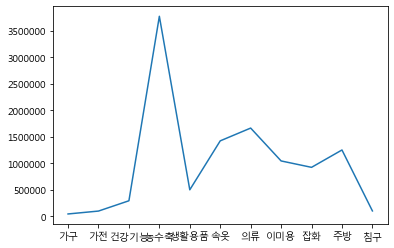

In [44]:
#상품군별 판매수량 그래프 2
q=ddf7['sale'].groupby(ddf7['type']).sum()

plt.plot(q)

In [45]:
ddf7_1=DataFrame(ddf7_1)
ddf7_1

,sale
datetime,
2019-01-01 06:00:00,819.448622
2019-01-01 07:00:00,811.491525
2019-01-01 08:00:00,1665.041736
2019-01-01 09:00:00,1151.556962
2019-01-01 10:00:00,3250.037547
...,...
2019-12-31 19:00:00,155.702800
2019-12-31 20:00:00,761.891640
2019-12-31 21:00:00,158.117802


In [46]:
ddf7_1=ddf7_1.reset_index()
ddf7_1

,datetime,sale
0,2019-01-01 06:00:00,819.448622
1,2019-01-01 07:00:00,811.491525
2,2019-01-01 08:00:00,1665.041736
3,2019-01-01 09:00:00,1151.556962
4,2019-01-01 10:00:00,3250.037547
...,...,...
8749,2019-12-31 19:00:00,155.702800
8750,2019-12-31 20:00:00,761.891640
8751,2019-12-31 21:00:00,158.117802
8752,2019-12-31 22:00:00,0.000000


In [47]:
ddf7_1['datetime'] = ddf7_1['datetime'].astype(str)

In [48]:
a=ddf7_1.loc[ddf7_1['datetime'].str.contains('06:00:00',na=False)].sum()
b=ddf7_1.loc[ddf7_1['datetime'].str.contains('07:00:00',na=False)].sum()
c=ddf7_1.loc[ddf7_1['datetime'].str.contains('08:00:00',na=False)].sum()
d=ddf7_1.loc[ddf7_1['datetime'].str.contains('09:00:00',na=False)].sum()
e=ddf7_1.loc[ddf7_1['datetime'].str.contains('10:00:00',na=False)].sum()
f=ddf7_1.loc[ddf7_1['datetime'].str.contains('11:00:00',na=False)].sum()
g=ddf7_1.loc[ddf7_1['datetime'].str.contains('12:00:00',na=False)].sum()
h=ddf7_1.loc[ddf7_1['datetime'].str.contains('13:00:00',na=False)].sum()
i=ddf7_1.loc[ddf7_1['datetime'].str.contains('14:00:00',na=False)].sum()
j=ddf7_1.loc[ddf7_1['datetime'].str.contains('15:00:00',na=False)].sum()
k=ddf7_1.loc[ddf7_1['datetime'].str.contains('16:00:00',na=False)].sum()
l=ddf7_1.loc[ddf7_1['datetime'].str.contains('17:00:00',na=False)].sum()
m=ddf7_1.loc[ddf7_1['datetime'].str.contains('18:00:00',na=False)].sum()
n=ddf7_1.loc[ddf7_1['datetime'].str.contains('19:00:00',na=False)].sum()
o=ddf7_1.loc[ddf7_1['datetime'].str.contains('20:00:00',na=False)].sum()
p=ddf7_1.loc[ddf7_1['datetime'].str.contains('21:00:00',na=False)].sum()
q=ddf7_1.loc[ddf7_1['datetime'].str.contains('22:00:00',na=False)].sum()
r=ddf7_1.loc[ddf7_1['datetime'].str.contains('23:00:00',na=False)].sum()
s=ddf7_1.loc[ddf7_1['datetime'].str.contains('00:00:00',na=False)].sum()

In [49]:
a

datetime    2019-01-01 06:00:002019-01-02 06:00:002019-01-...
sale                                                   362173
dtype: object

In [50]:
#시간대별(1시간단위) 판매수량
df3=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s], axis=1)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
datetime,2019-01-01 06:00:002019-01-02 06:00:002019-01-...,2019-01-01 07:00:002019-01-02 07:00:002019-01-...,2019-01-01 08:00:002019-01-02 08:00:002019-01-...,2019-01-01 09:00:002019-01-02 09:00:002019-01-...,2019-01-01 10:00:002019-01-02 10:00:002019-01-...,2019-01-01 11:00:002019-01-02 11:00:002019-01-...,2019-01-01 12:00:002019-01-02 12:00:002019-01-...,2019-01-01 13:00:002019-01-02 13:00:002019-01-...,2019-01-01 14:00:002019-01-02 14:00:002019-01-...,2019-01-01 15:00:002019-01-02 15:00:002019-01-...,2019-01-01 16:00:002019-01-02 16:00:002019-01-...,2019-01-01 17:00:002019-01-02 17:00:002019-01-...,2019-01-01 18:00:002019-01-02 18:00:002019-01-...,2019-01-01 19:00:002019-01-02 19:00:002019-01-...,2019-01-01 20:00:002019-01-02 20:00:002019-01-...,2019-01-01 21:00:002019-01-02 21:00:002019-01-...,2019-01-01 22:00:002019-01-02 22:00:002019-01-...,2019-01-01 23:00:002019-01-02 23:00:002019-01-...,2019-01-02 00:00:002019-01-03 00:00:002019-01-...
sale,362173,585919,566918,631057,628281,658351,540159,657682,644532,692145,1.01155e+06,977720,722616,515748,494152,315808,294814,292058,289587


In [51]:
df3.reset_index(level=[0], inplace = True)

In [52]:
df3

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,datetime,2019-01-01 06:00:002019-01-02 06:00:002019-01-...,2019-01-01 07:00:002019-01-02 07:00:002019-01-...,2019-01-01 08:00:002019-01-02 08:00:002019-01-...,2019-01-01 09:00:002019-01-02 09:00:002019-01-...,2019-01-01 10:00:002019-01-02 10:00:002019-01-...,2019-01-01 11:00:002019-01-02 11:00:002019-01-...,2019-01-01 12:00:002019-01-02 12:00:002019-01-...,2019-01-01 13:00:002019-01-02 13:00:002019-01-...,2019-01-01 14:00:002019-01-02 14:00:002019-01-...,2019-01-01 15:00:002019-01-02 15:00:002019-01-...,2019-01-01 16:00:002019-01-02 16:00:002019-01-...,2019-01-01 17:00:002019-01-02 17:00:002019-01-...,2019-01-01 18:00:002019-01-02 18:00:002019-01-...,2019-01-01 19:00:002019-01-02 19:00:002019-01-...,2019-01-01 20:00:002019-01-02 20:00:002019-01-...,2019-01-01 21:00:002019-01-02 21:00:002019-01-...,2019-01-01 22:00:002019-01-02 22:00:002019-01-...,2019-01-01 23:00:002019-01-02 23:00:002019-01-...,2019-01-02 00:00:002019-01-03 00:00:002019-01-...
1,sale,362173,585919,566918,631057,628281,658351,540159,657682,644532,692145,1.01155e+06,977720,722616,515748,494152,315808,294814,292058,289587


In [53]:
c1=['06:00:00','07:00:00','08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00','00:00:00']
c2=[362132,585836,566916,630408,628077,658176,539998,657551,643585,692094,1.01155e+06,977699,722616,515030,492163,311617,289725,290097,288939]
dd=pd.DataFrame(c1,c2)
dd
dd1=dd.T
dd1=dd1.T
dd1

,0
362132.0,06:00:00
585836.0,07:00:00
566916.0,08:00:00
630408.0,09:00:00
628077.0,10:00:00
658176.0,11:00:00
539998.0,12:00:00
657551.0,13:00:00
643585.0,14:00:00
692094.0,15:00:00


In [54]:
dd1.reset_index(level=[0], inplace = True)
dd1

,index,0
0,362132.0,06:00:00
1,585836.0,07:00:00
2,566916.0,08:00:00
3,630408.0,09:00:00
4,628077.0,10:00:00
5,658176.0,11:00:00
6,539998.0,12:00:00
7,657551.0,13:00:00
8,643585.0,14:00:00
9,692094.0,15:00:00


In [55]:
dd1.columns=['sale','hour']

In [56]:
dd1=dd1[['hour','sale']]

In [57]:
#시간대별 판매수량
dd1

,hour,sale
0,06:00:00,362132.0
1,07:00:00,585836.0
2,08:00:00,566916.0
3,09:00:00,630408.0
4,10:00:00,628077.0
5,11:00:00,658176.0
6,12:00:00,539998.0
7,13:00:00,657551.0
8,14:00:00,643585.0
9,15:00:00,692094.0


[Text(0, 0.5, '판매수량'), Text(0.5, 0, '시간대'), Text(0.5, 1.0, '시간대별 판매수량')]

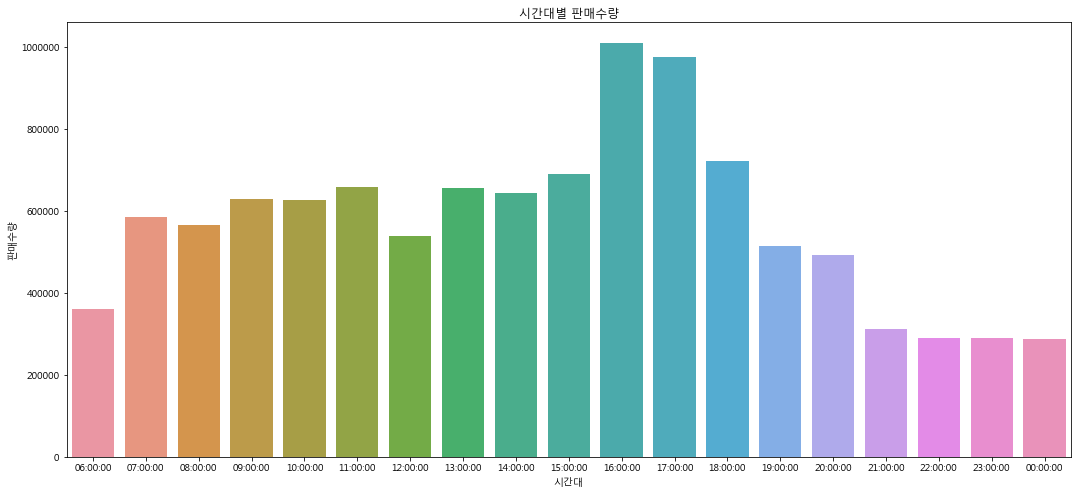

In [58]:
#시간대별 판매수량 그래프 1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,8)
sns.barplot(data=dd1,x="hour",y="sale")
ax1.set(xlabel='시간대',ylabel='판매수량',title='시간대별 판매수량')

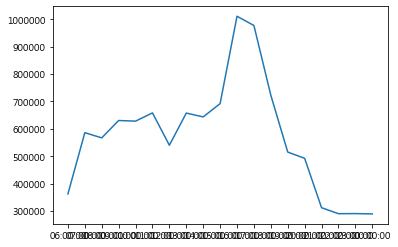

In [59]:
#시간대별 판매수량 그래프2
fig,ax=plt.subplots(1,1)
ax.plot(dd1['hour'],dd1['sale'])

In [60]:
dd1.sort_values(by='sale',ascending=False)

,hour,sale
10,16:00:00,1011550.0
11,17:00:00,977699.0
12,18:00:00,722616.0
9,15:00:00,692094.0
5,11:00:00,658176.0
7,13:00:00,657551.0
8,14:00:00,643585.0
3,09:00:00,630408.0
4,10:00:00,628077.0
1,07:00:00,585836.0


In [61]:
grouped=ddf7['sale'].groupby(ddf7['exp'])
grouped

In [62]:
time_ddf7=grouped.mean()
time_ddf7
time_ddf7=DataFrame(time_ddf7)
time_ddf7=time_ddf7.reset_index()

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '노출(분)'), Text(0.5, 1.0, '노출시간별 판매수량')]

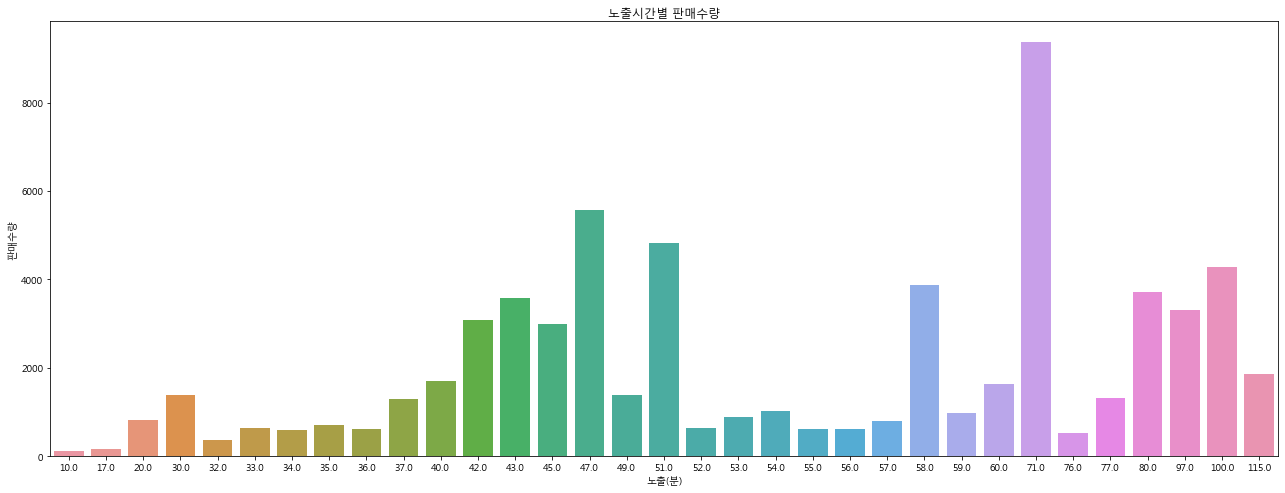

In [63]:
#노출시간별 판매수량 그래프1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(22,8)
sns.barplot(data=time_ddf7,x="exp",y="sale",ax=ax1)
ax1.set(xlabel='노출(분)',ylabel='판매수량',title='노출시간별 판매수량')

In [64]:
time_ddf7.sort_values(by='sale',ascending=False)

,exp,sale
26,71.0,9371.404682
14,47.0,5567.865903
16,51.0,4819.265197
31,100.0,4281.423718
23,58.0,3879.596110
29,80.0,3713.138258
12,43.0,3589.264590
30,97.0,3315.538847
11,42.0,3077.424749
13,45.0,2983.556231


In [65]:
grouped=ddf7['sale'].groupby(ddf7['exp'])
grouped
time_ddf7=grouped.mean()
time_ddf7

exp
10.0      111.871795
17.0      163.967386
20.0      813.702545
30.0     1394.210526
32.0      361.157816
33.0      628.603438
34.0      589.899833
35.0      695.953534
36.0      623.314911
37.0     1296.814981
40.0     1708.771700
42.0     3077.424749
43.0     3589.264590
45.0     2983.556231
47.0     5567.865903
49.0     1386.655518
51.0     4819.265197
52.0      644.918122
53.0      877.087470
54.0     1025.334821
55.0      617.231476
56.0      616.916285
57.0      806.369371
58.0     3879.596110
59.0      985.661016
60.0     1629.926061
71.0     9371.404682
76.0      524.563260
77.0     1317.194389
80.0     3713.138258
97.0     3315.538847
100.0    4281.423718
115.0    1855.669464
Name: sale, dtype: float64

Text(0, 0.5, '판매수량')

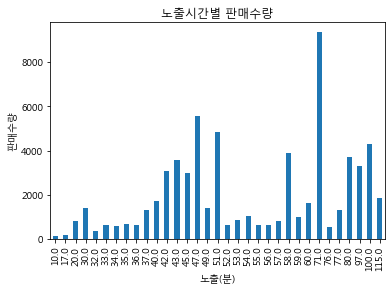

In [66]:
#노출시간별 판매수량 그래프2

ax = time_ddf7.plot(kind='bar', title='노출시간별 판매수량')
ax.set_xlabel('노출(분)')        
ax.set_ylabel('판매수량')

In [67]:
grouped=ddf7['sale'].groupby(ddf7['price'])
grouped

In [68]:
p=grouped.mean()
p
p=DataFrame(p)
p=p.reset_index()
p

,price,sale
0,2.900000e+04,3140.611330
1,2.980000e+04,3640.729501
2,2.990000e+04,3696.200297
3,3.090000e+04,4458.868864
4,3.240000e+04,1876.099586
...,...,...
287,2.599000e+06,32.706682
288,2.831000e+06,7.180649
289,2.992500e+06,24.463439
290,3.218571e+06,64.764306


[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '판매단가별 판매수량')]

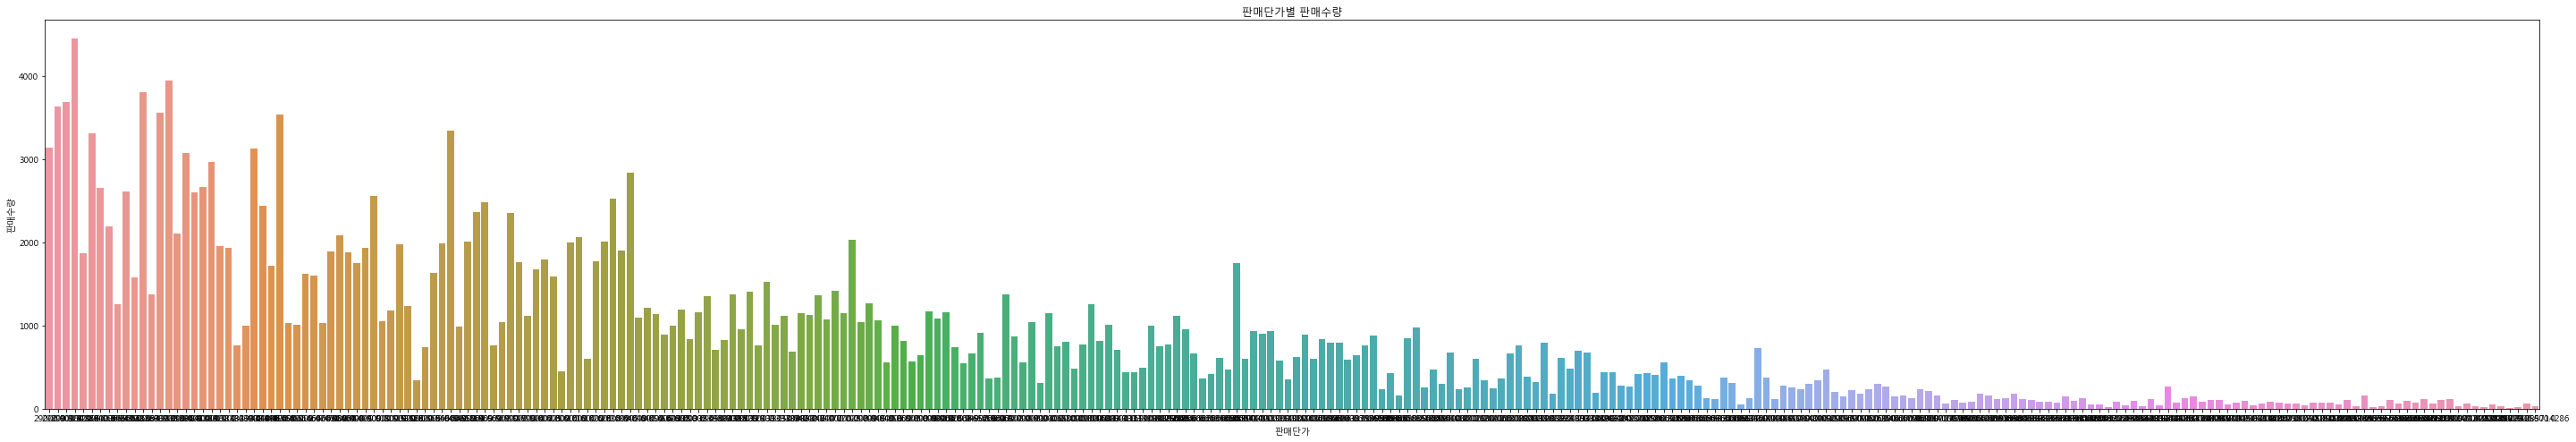

In [69]:
#판매단가별 판매수량 그래프1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=p,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='판매단가별 판매수량')

In [70]:
p.sort_values(by='sale',ascending=False)

,price,sale
3,30900.0,4458.868864
14,38900.0,3945.548163
11,35000.0,3807.011429
2,29900.0,3696.200297
1,29800.0,3640.729501
...,...,...
272,1930000.0,25.143225
289,2992500.0,24.463439
285,2429000.0,20.330143
241,1204000.0,19.462977


In [71]:
grouped=ddf7['sale'].groupby(ddf7['price'])
grouped
p=grouped.mean()
p

price
2.900000e+04    3140.611330
2.980000e+04    3640.729501
2.990000e+04    3696.200297
3.090000e+04    4458.868864
3.240000e+04    1876.099586
                   ...     
2.599000e+06      32.706682
2.831000e+06       7.180649
2.992500e+06      24.463439
3.218571e+06      64.764306
3.505500e+06      32.126248
Name: sale, Length: 292, dtype: float64

Text(0.5, 0, 'price')

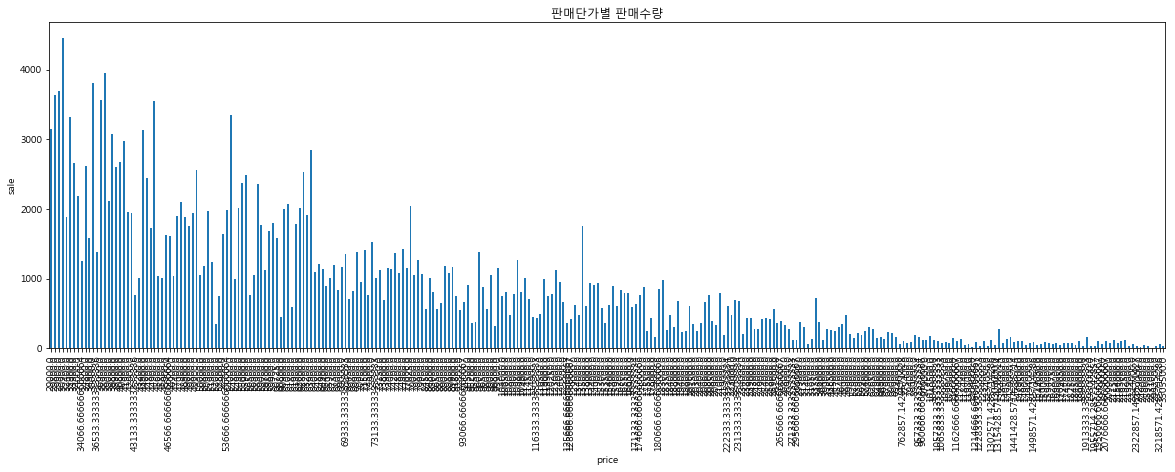

In [72]:
#판매단가별 판매수량 그래프2

ax = p.plot(kind='bar', title='판매단가별 판매수량',figsize=(20,6))
       
ax.set_ylabel('sale')
ax.set_xlabel('price')

## 정리

- 월별 판매량은 12월이 가장 크고 그 뒤로 8,11,10,7월이 큼. 가장 적은 달은 2월
- 상품군별 판매량은 농수축이 가장 크고 그 뒤로 의류, 속옷, 주방, 이미용이 큼. 가장 적은 상품군은 가구
- 시간대별 판매량은 16시가 가장 크고 그 뒤로 17시, 18시, 15시, 11시(오전)이 큼. 가장 적은 시간대는 00시
- 노출시간(분)별 판매량은 71분이 가장 크고 그 뒤로 58분, 47분, 51분, 100분이 큼. 가장 적은 노출시간은 50분
- 판매단가별 판매량은 30,900원이 가장 크고 그 뒤로 38,900원, 35,000원, 29,900원, 29,800원이 큼. 가장 적은 판매단가는 2,831,000원

In [73]:
ddf7_2.head()

,sale
datetime,
2019-01-31,943366.065802
2019-02-28,750497.840037
2019-03-31,816206.755043
2019-04-30,759495.530792
2019-05-31,870288.223008


In [74]:
#ddf7_2.to_csv("month.csv")

In [75]:
ddf7.head()

,datetime,exp,mcode,type,price,amount,sale
datetime,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547


In [76]:
#ddf7.tail()

In [77]:
#ddf7.to_csv("최종정리.csv")

In [78]:
ddf7['datetime'] = ddf7['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))

In [79]:
ddf7

,datetime,exp,mcode,type,price,amount,sale
datetime,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547
...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000,2548.379747
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000,155.702800
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000,761.891640


In [80]:
ddf7['day']=ddf7['datetime'].dt.day_name()

In [81]:
ddf7.head(100)

,datetime,exp,mcode,type,price,amount,sale,day
datetime,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,3.990000e+04,32696000,819.448622,Tuesday
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,5.900000e+04,47878000,811.491525,Tuesday
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,5.990000e+04,99736000,1665.041736,Tuesday
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,7.900000e+04,90973000,1151.556962,Tuesday
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,7.990000e+04,259678000,3250.037547,Tuesday
...,...,...,...,...,...,...,...,...
2019-01-05 20:00:00,2019-01-05 20:00:00,60.0,100610,속옷,8.900000e+04,90011000,1011.359551,Saturday
2019-01-05 21:00:00,2019-01-05 21:00:00,60.0,100148,가전,2.076667e+06,270528000,142.874891,Saturday
2019-01-05 22:00:00,2019-01-05 22:00:00,60.0,100607,속옷,1.190000e+05,171008000,1437.042017,Saturday


In [82]:
holiday=[]

# 열에 추가할 각 행을 For로 순회합니다, 
for row in ddf7['day']: 
    if row == "Saturday": 
        holiday.append('1') 
    elif row == "Sunday": 
        holiday.append('1')
    else:
        holiday.append('0')
ddf7['holiday'] = holiday

In [83]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday
datetime,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622,Tuesday,0
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525,Tuesday,0
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736,Tuesday,0
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962,Tuesday,0
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547,Tuesday,0
...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000,2548.379747,Tuesday,0
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000,155.702800,Tuesday,0
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000,761.891640,Tuesday,0


In [84]:
ddf7.head(100)

,datetime,exp,mcode,type,price,amount,sale,day,holiday
datetime,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,3.990000e+04,32696000,819.448622,Tuesday,0
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,5.900000e+04,47878000,811.491525,Tuesday,0
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,5.990000e+04,99736000,1665.041736,Tuesday,0
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,7.900000e+04,90973000,1151.556962,Tuesday,0
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,7.990000e+04,259678000,3250.037547,Tuesday,0
...,...,...,...,...,...,...,...,...,...
2019-01-05 20:00:00,2019-01-05 20:00:00,60.0,100610,속옷,8.900000e+04,90011000,1011.359551,Saturday,1
2019-01-05 21:00:00,2019-01-05 21:00:00,60.0,100148,가전,2.076667e+06,270528000,142.874891,Saturday,1
2019-01-05 22:00:00,2019-01-05 22:00:00,60.0,100607,속옷,1.190000e+05,171008000,1437.042017,Saturday,1


In [85]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday
datetime,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622,Tuesday,0
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525,Tuesday,0
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736,Tuesday,0
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962,Tuesday,0
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547,Tuesday,0
...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000,2548.379747,Tuesday,0
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000,155.702800,Tuesday,0
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000,761.891640,Tuesday,0


In [86]:
hol=ddf7['sale'].groupby(ddf7['holiday']).sum()

In [87]:
hol=DataFrame(hol)
hol=hol.reset_index()
hol

,holiday,sale
0,0,7.704195e+06
1,1,3.432218e+06


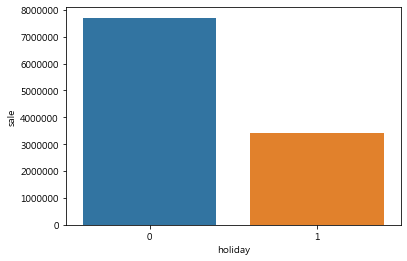

In [88]:
sns.barplot(data=hol, x="holiday", y="sale")

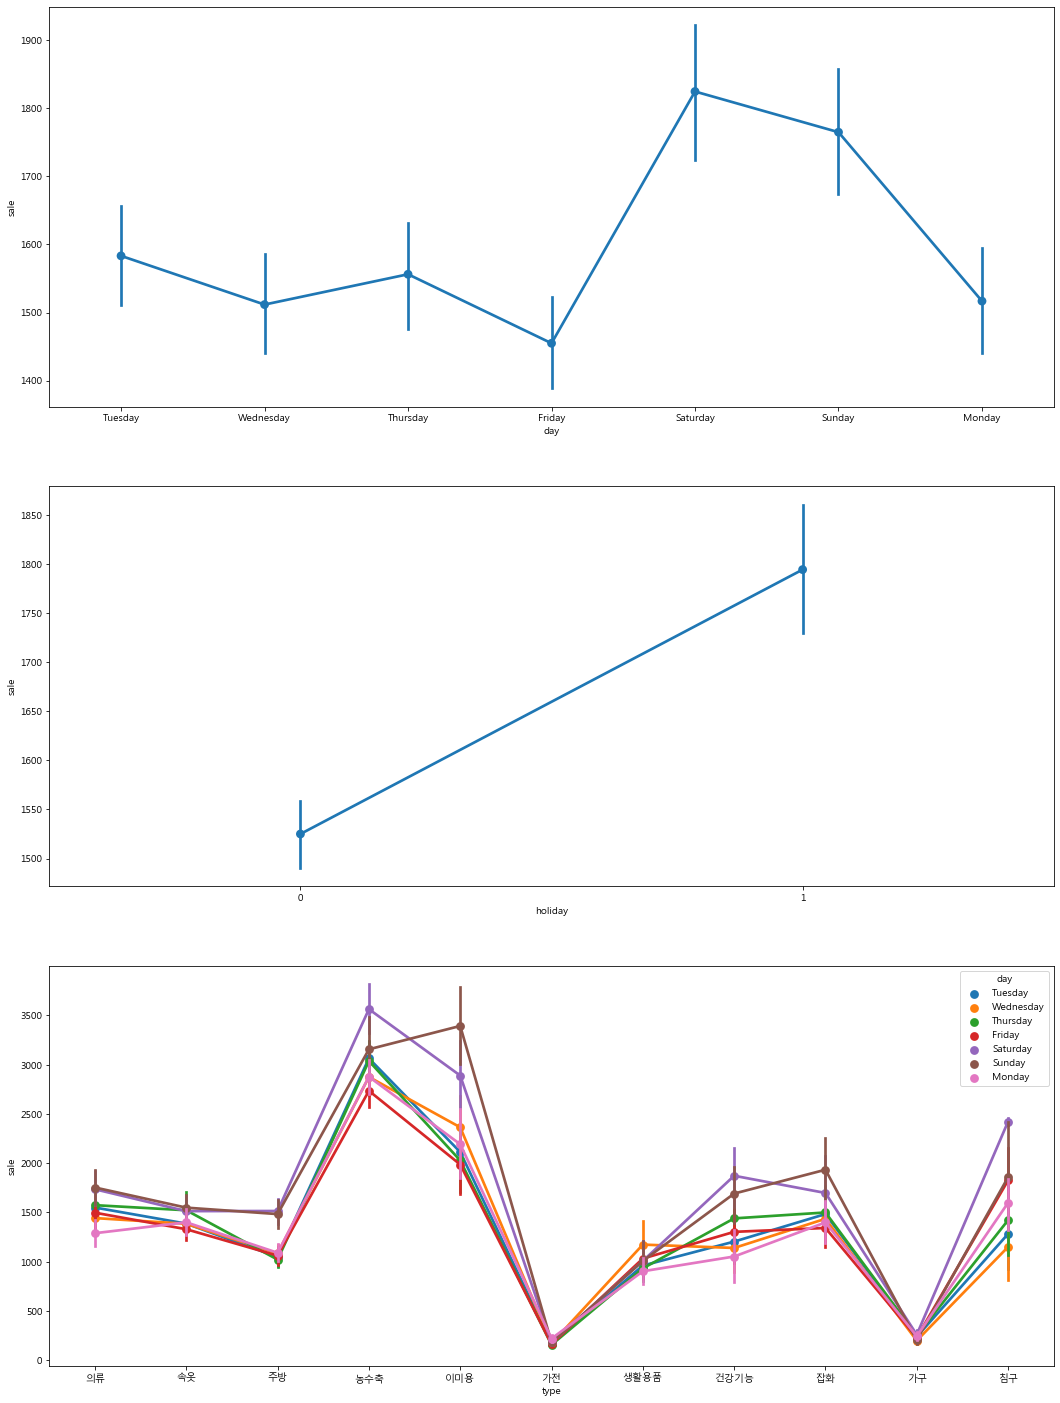

In [89]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)
sns.pointplot(data=ddf7, x="day", y="sale", ax=ax1,title="요일별 판매수량")

sns.pointplot(data=ddf7, x="holiday", y="sale", ax=ax2, title="평일, 주말 판매수량")

sns.pointplot(data=ddf7, x="type", y="sale", hue="day",ax=ax3,title="요일에 따른 상품군별 판매수량")

In [90]:
ex=[]
#40분 미만은 1, 41분~45분은 2, 46~50은 3, 51~55는 4 56~60은 5, 61~65는 6 67
for row in ddf7['exp']: 
    if row <40 : 
        ex.append('40분 미만') 
    elif row>=41 and row<=45 : 
        ex.append('41~45')
    elif row>=46 and row<=50 : 
        ex.append('46~50')
    elif row>=51 and row<=55 : 
        ex.append('51~55')
    elif row>=56 and row<=60 : 
        ex.append('56~60')
    elif row>=61 and row<=65 : 
        ex.append('61~65')
    elif row>=66 and row<=70 : 
        ex.append('66~70')
    elif row>=71 and row<=75 : 
        ex.append('71~75')
    elif row>=76 and row<=80 : 
        ex.append('76~80')
    else:
        ex.append('80분 초과')
        
        
ddf7['exp2'] = ex

In [91]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2
datetime,,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000,819.448622,Tuesday,0,56~60
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000,811.491525,Tuesday,0,56~60
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000,1665.041736,Tuesday,0,56~60
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000,1151.556962,Tuesday,0,56~60
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000,3250.037547,Tuesday,0,56~60
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000,2548.379747,Tuesday,0,56~60
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000,155.702800,Tuesday,0,56~60
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000,761.891640,Tuesday,0,56~60


In [92]:
expp=ddf7['sale'].groupby(ddf7['exp2']).mean()
expp=DataFrame(expp)

In [93]:
expp=expp.reset_index()

In [94]:
expp

,exp2,sale
0,40분 미만,794.475380
1,41~45,3365.754950
2,46~50,4174.129108
3,51~55,814.871735
4,56~60,1607.097320
5,71~75,9371.404682
6,76~80,3586.217375
7,80분 초과,1765.696922


[Text(0, 0.5, '판매수량'), Text(0.5, 0, '노출시간'), Text(0.5, 1.0, '노출시간별 판매수량')]

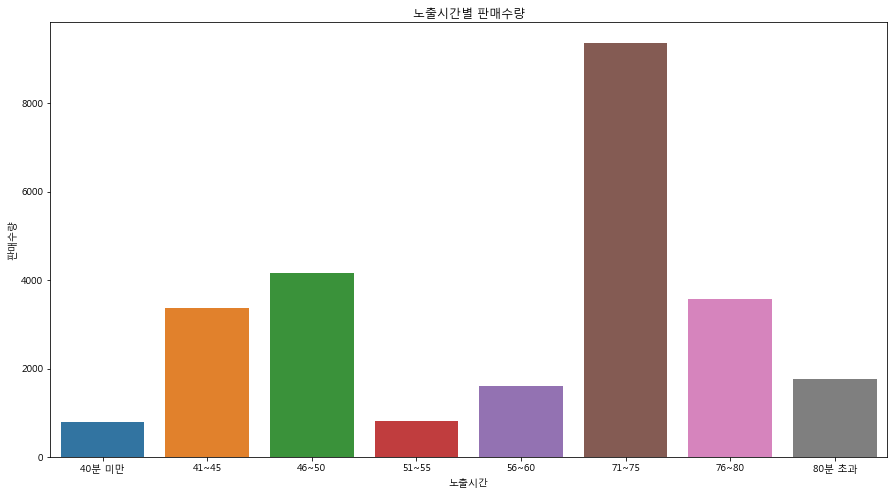

In [95]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(15,8)
sns.barplot(data=expp,x="exp2",y="sale",ax=ax1)
ax1.set(xlabel='노출시간',ylabel='판매수량',title='노출시간별 판매수량')

### 노출시간에 따른 시간대별 판매수량(+상품군 고려), 상품군에 따른 판매단가별 판매수량

In [96]:
ddf7_a = ddf7[ddf7['type']=='가구']
ddf7_b = ddf7[ddf7['type']=='가전']
ddf7_c = ddf7[ddf7['type']=='건강기능']
ddf7_d = ddf7[ddf7['type']=='농수축']
ddf7_e = ddf7[ddf7['type']=='생활용품']
ddf7_f = ddf7[ddf7['type']=='속옷']
ddf7_g = ddf7[ddf7['type']=='의류']
ddf7_h = ddf7[ddf7['type']=='이미용']
ddf7_i = ddf7[ddf7['type']=='잡화']
ddf7_j = ddf7[ddf7['type']=='주방']
ddf7_k = ddf7[ddf7['type']=='침구']

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '판매단가별 판매수량')]

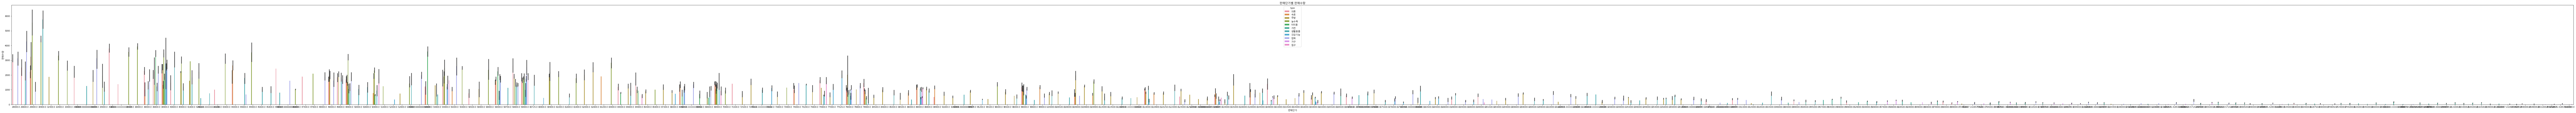

In [97]:
#상품군에 따른 판매단가별 판매수량 그래프1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(200,8)
sns.barplot(data=ddf7,x="price",y="sale",ax=ax1, hue="type")
ax1.set(xlabel='판매단가',ylabel='판매수량',title='판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '가구 판매단가별 판매수량')]

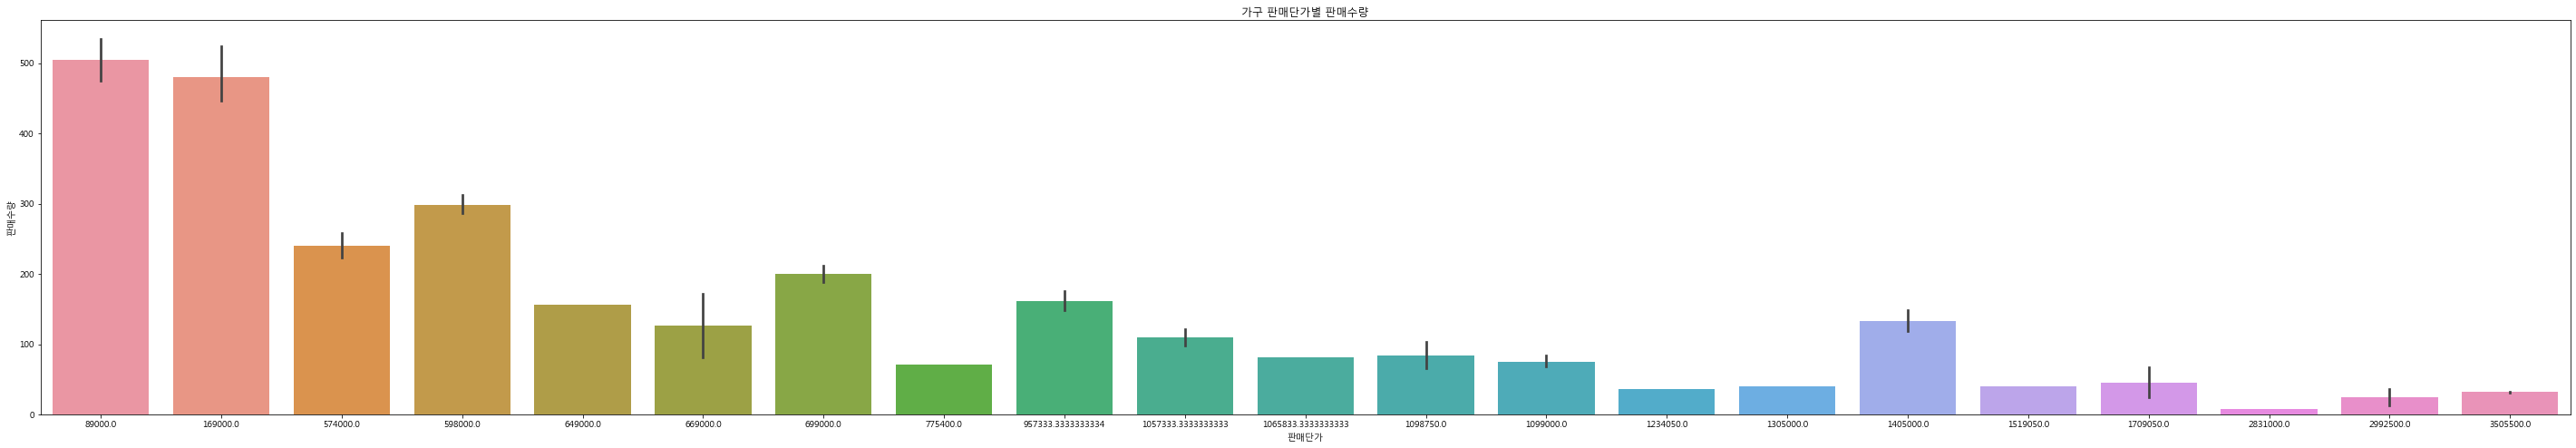

In [98]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_a,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='가구 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '가전 판매단가별 판매수량')]

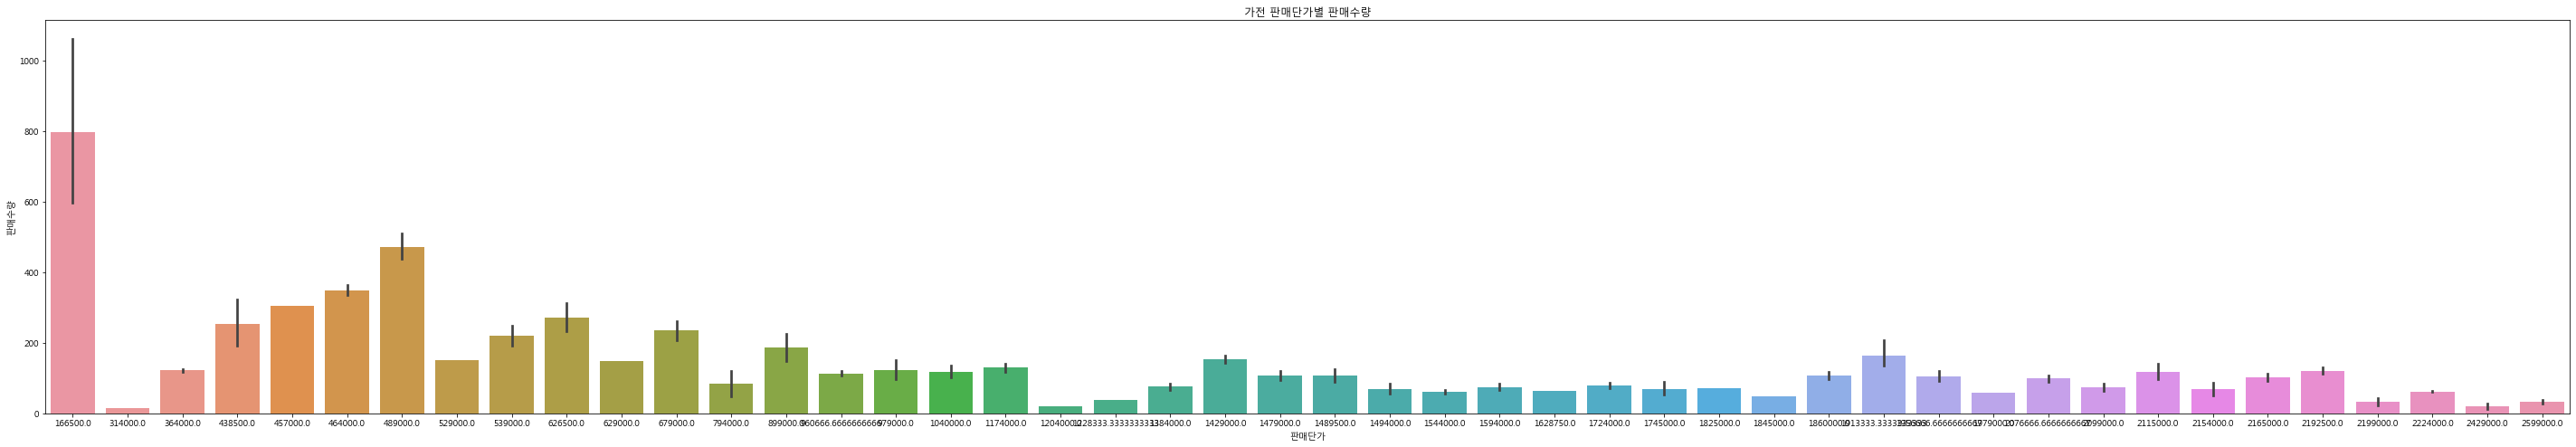

In [99]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_b,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='가전 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '건강기능 판매단가별 판매수량')]

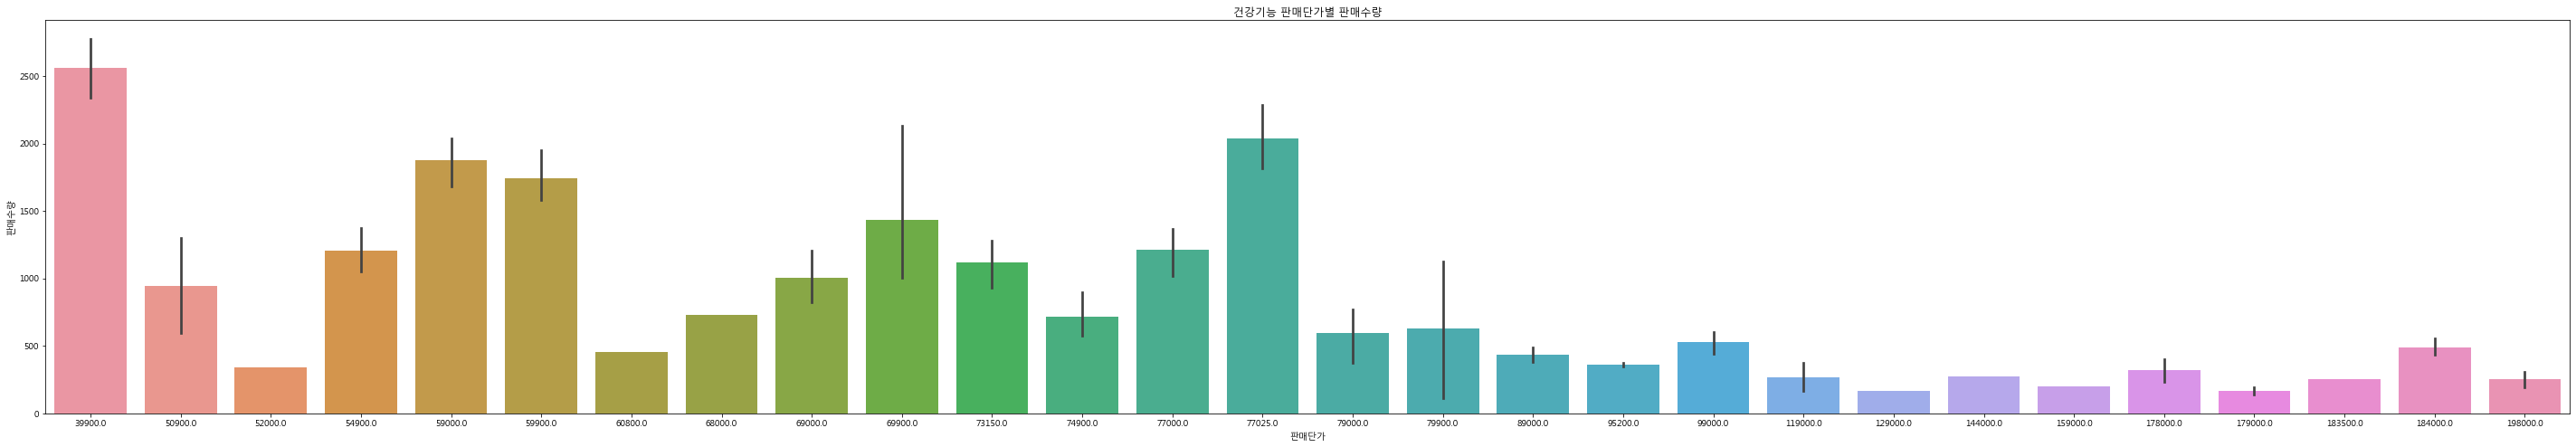

In [100]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_c,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='건강기능 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '농수축 판매단가별 판매수량')]

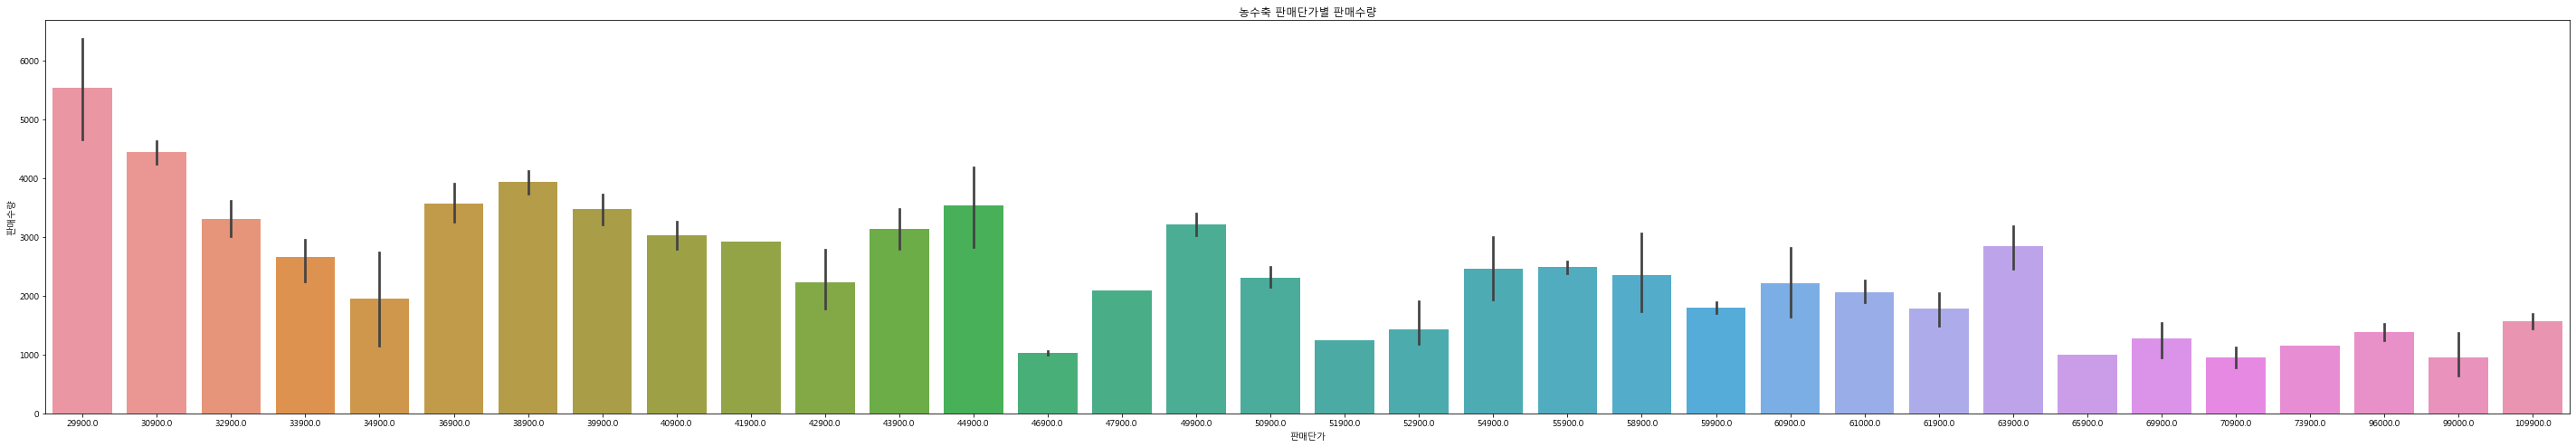

In [101]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_d,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='농수축 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '생활용품 판매단가별 판매수량')]

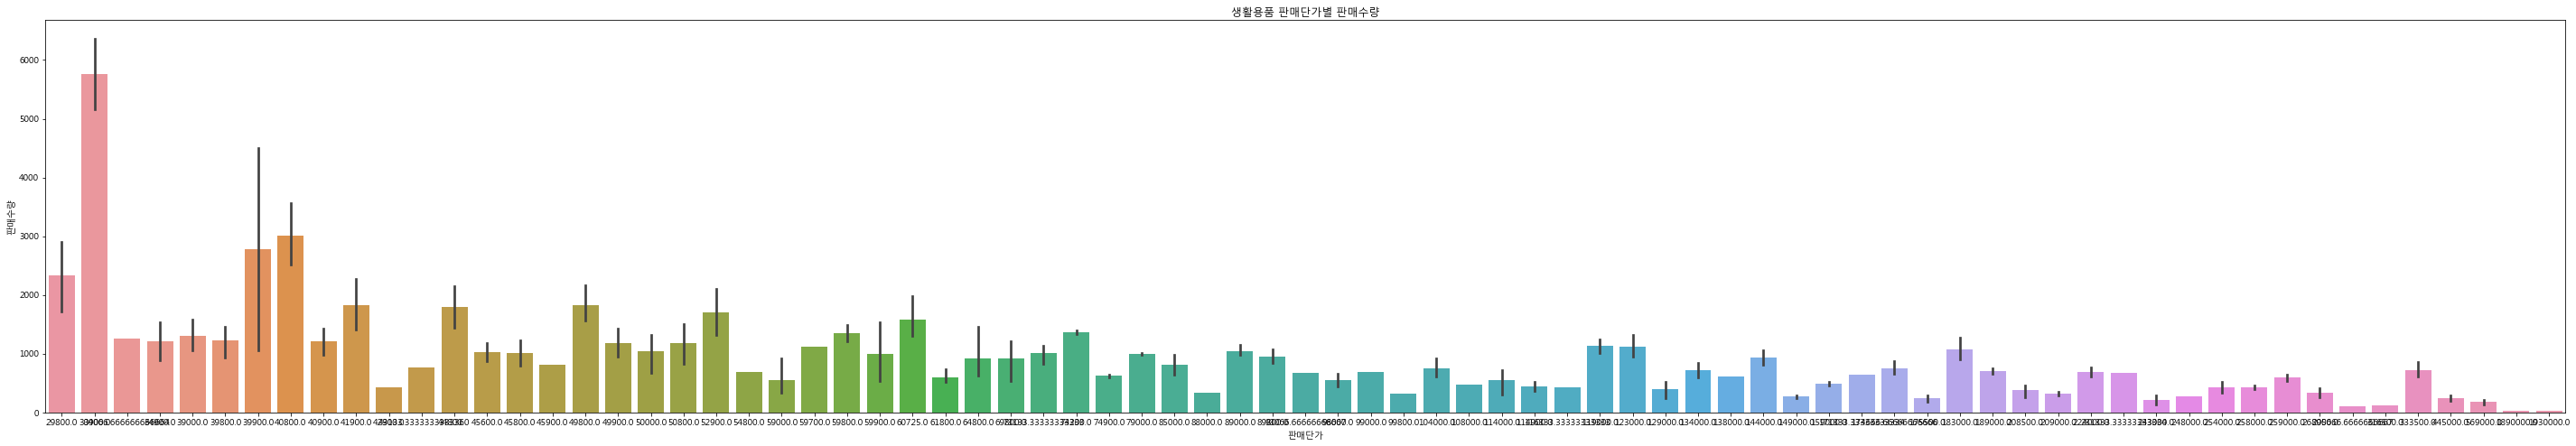

In [102]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_e,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='생활용품 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '속옷 판매단가별 판매수량')]

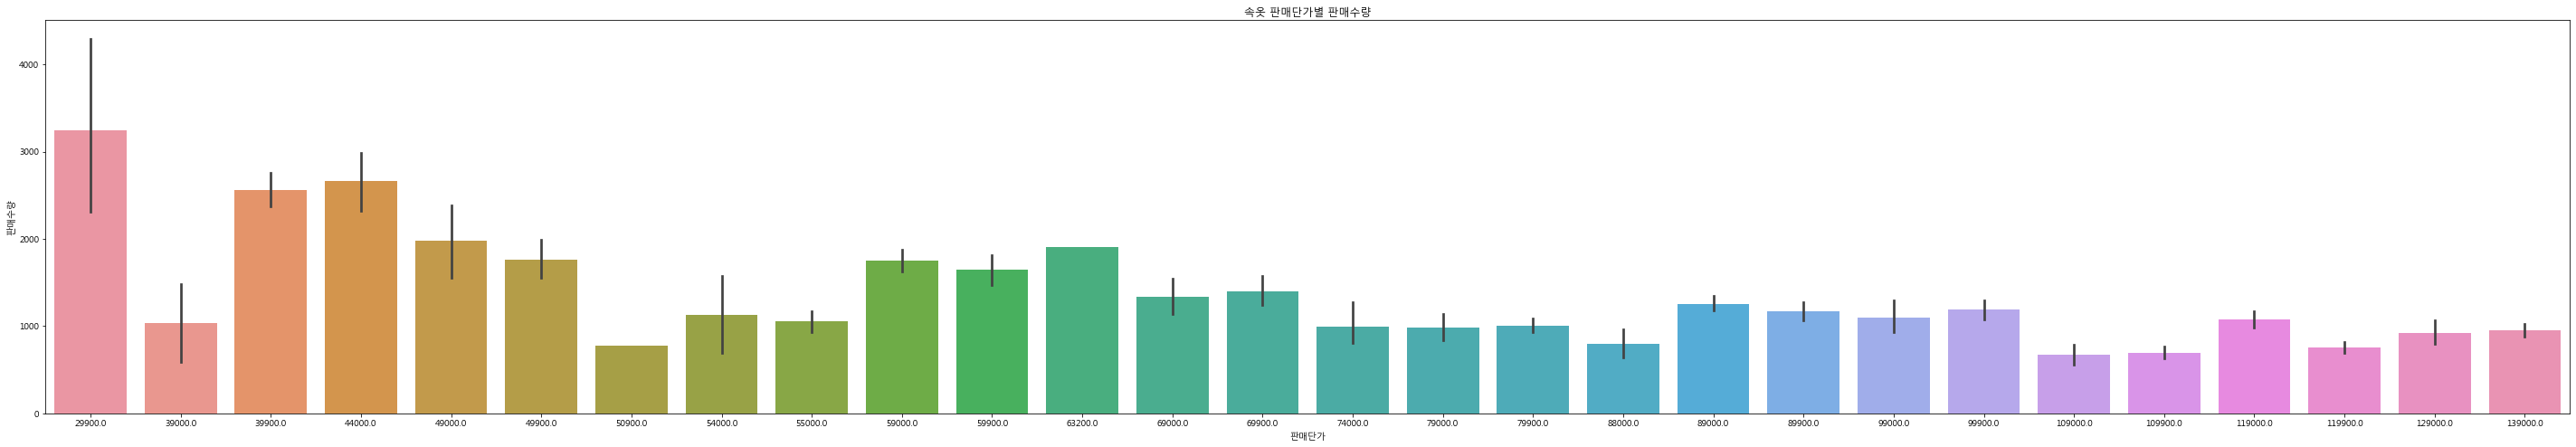

In [103]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_f,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='속옷 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '의류 판매단가별 판매수량')]

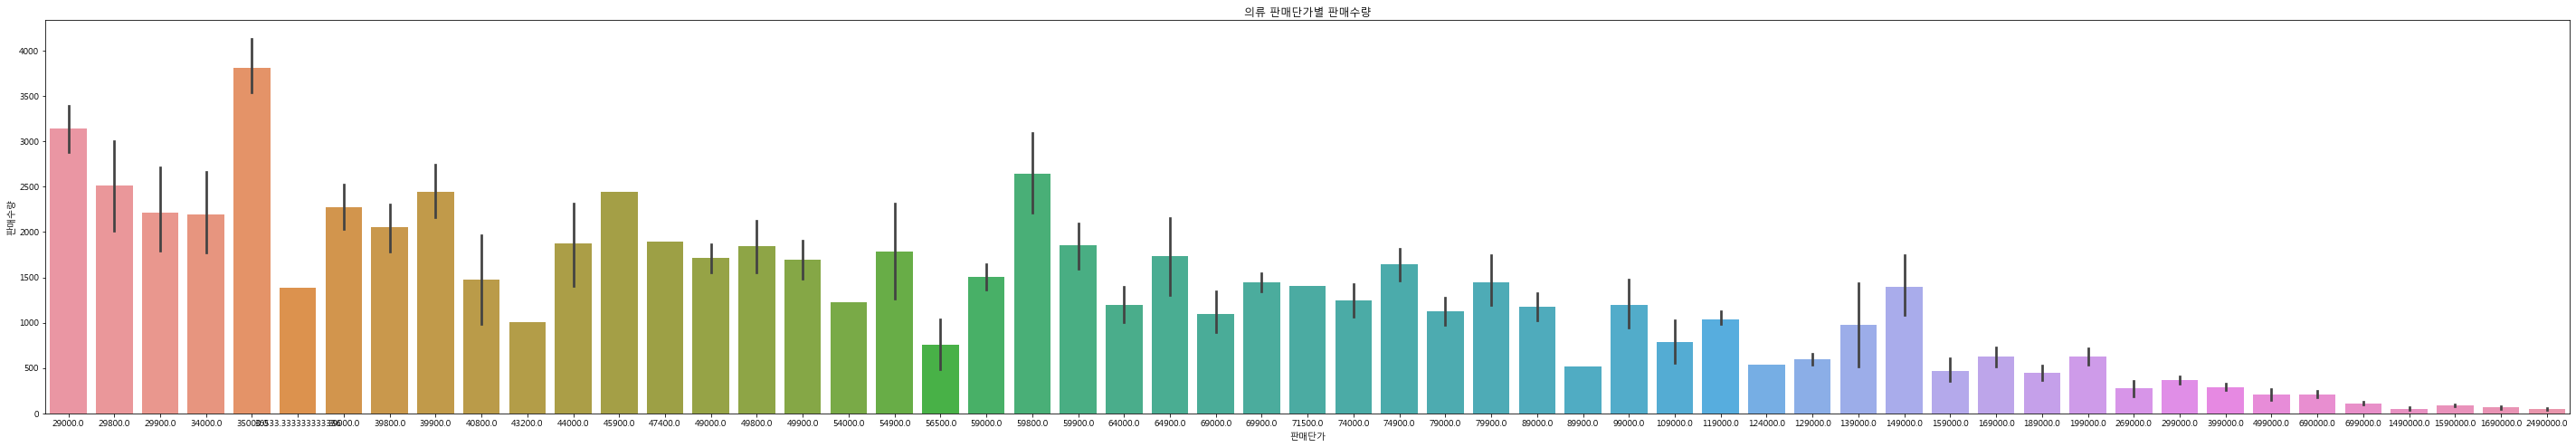

In [104]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_g,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='의류 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '이미용 판매단가별 판매수량')]

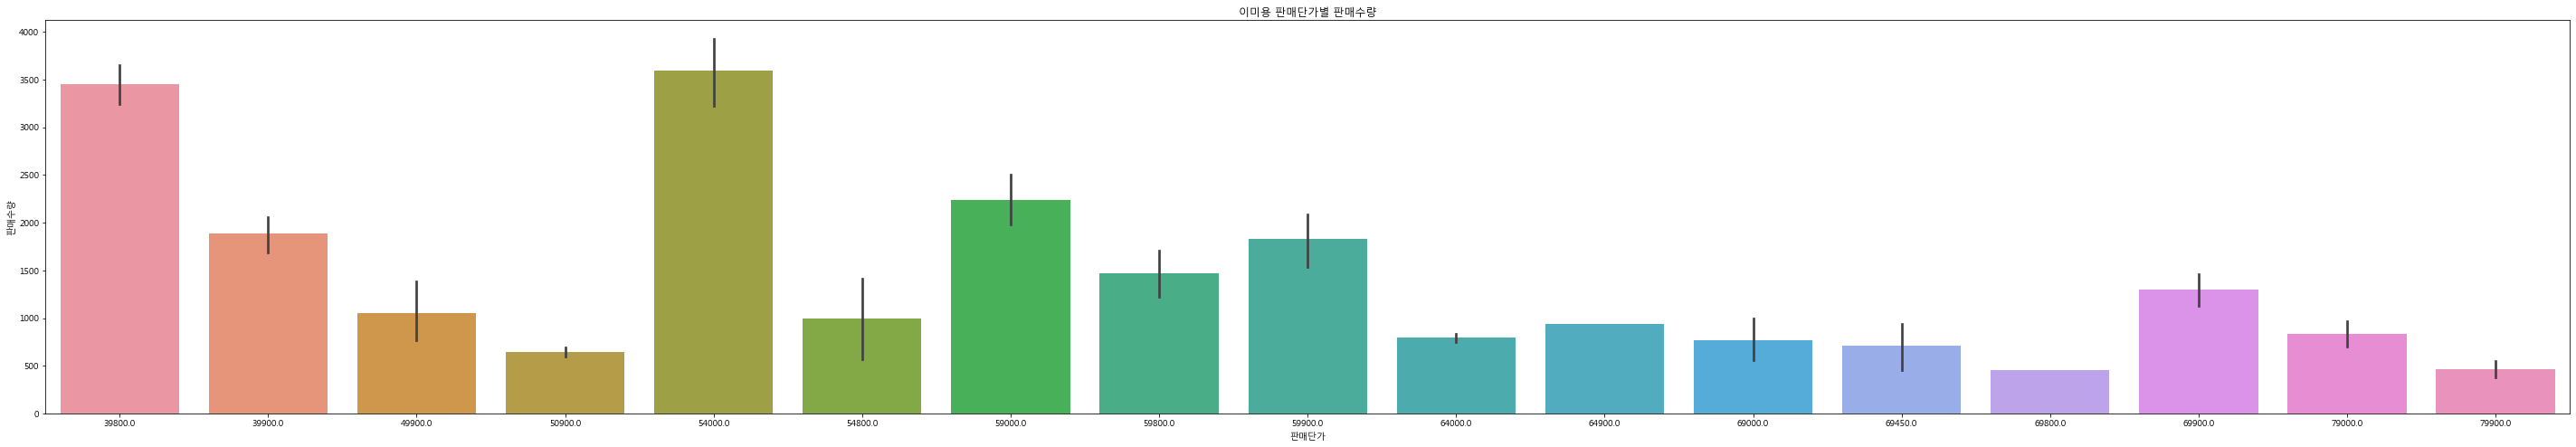

In [105]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_h,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='이미용 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '잡화 판매단가별 판매수량')]

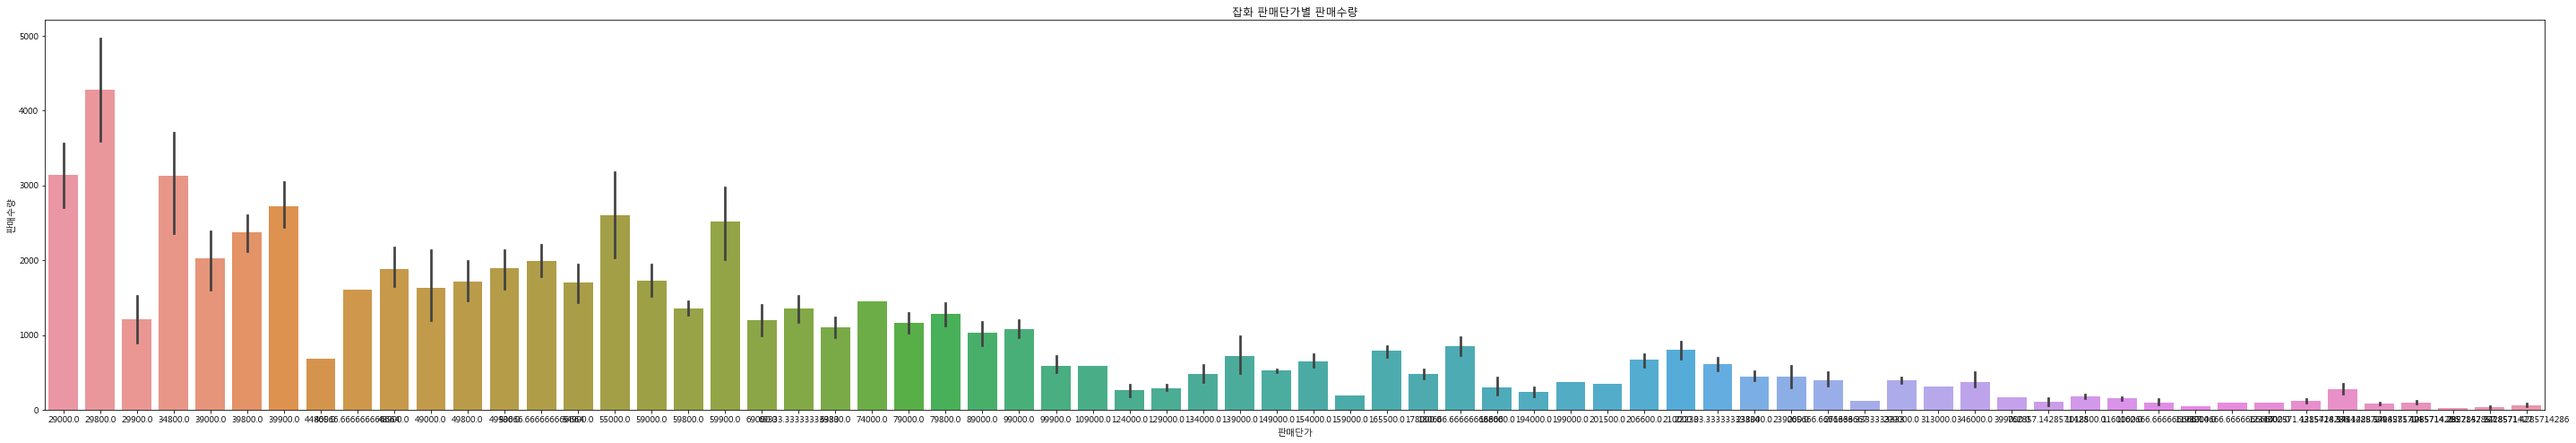

In [106]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_i,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='잡화 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '주방 판매단가별 판매수량')]

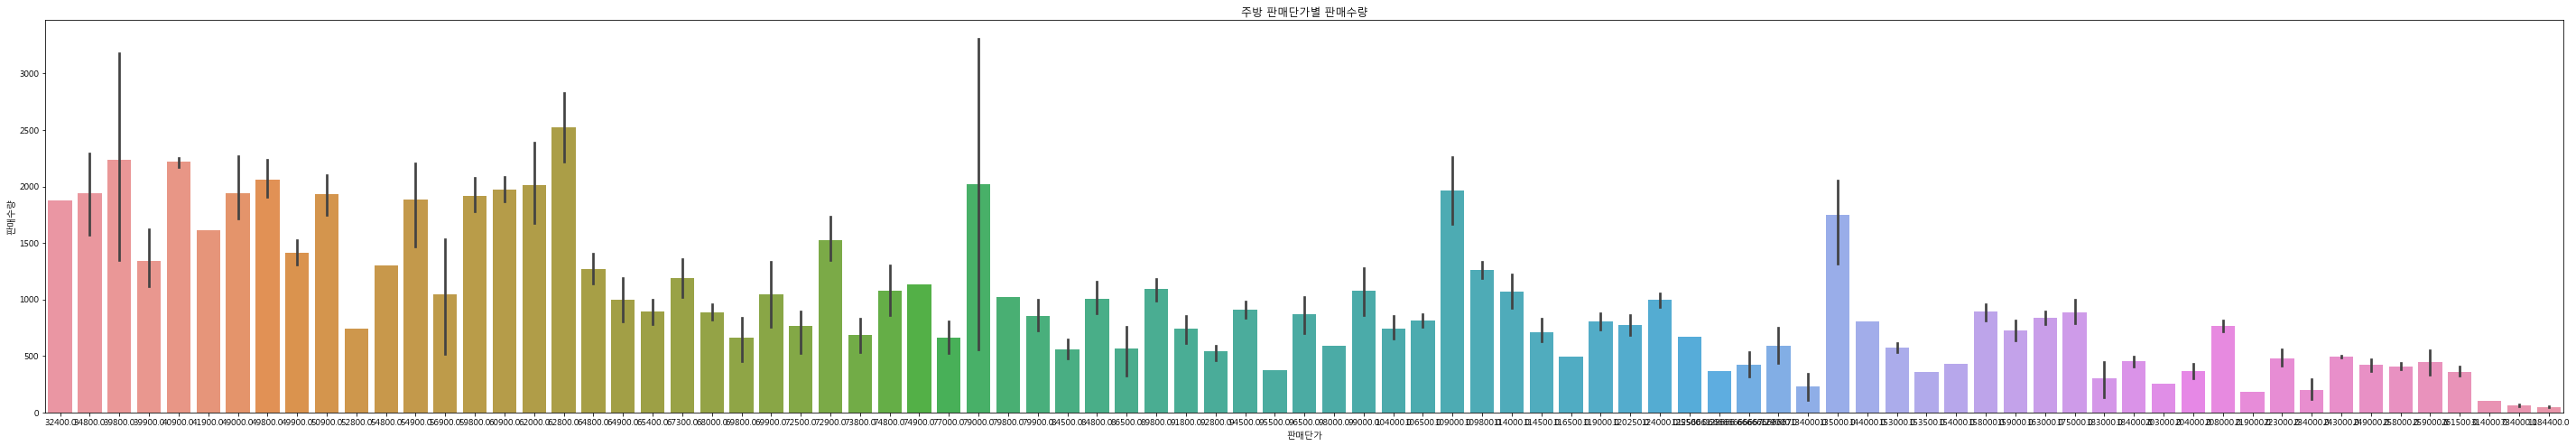

In [107]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_j,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='주방 판매단가별 판매수량')

[Text(0, 0.5, '판매수량'), Text(0.5, 0, '판매단가'), Text(0.5, 1.0, '침구 판매단가별 판매수량')]

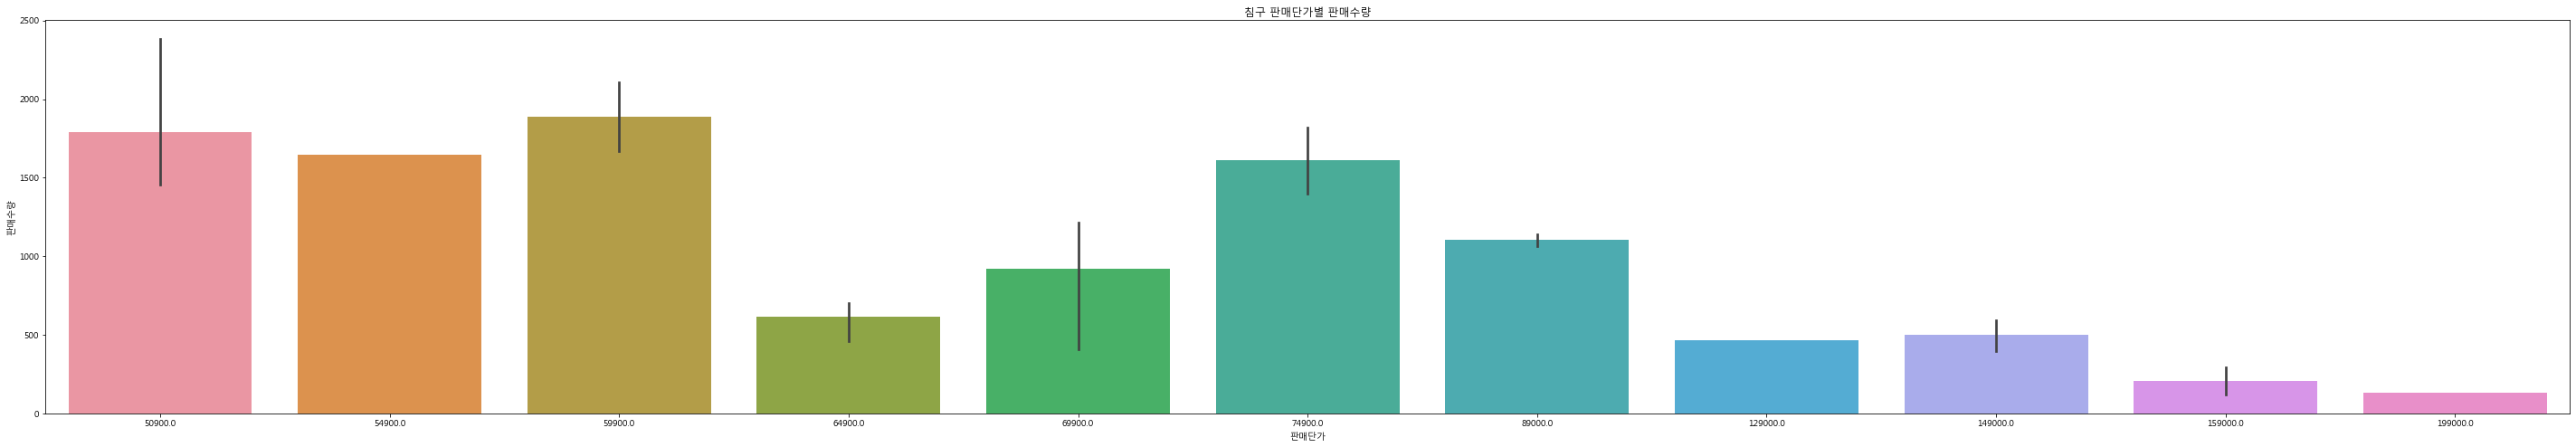

In [108]:
figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=ddf7_k,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='침구 판매단가별 판매수량')

## RandomForest

In [173]:
ddf7.loc[ddf7['type'] == '농수축', 'type'] = 10
ddf7.loc[ddf7['type'] == '의류', 'type'] = 9
ddf7.loc[ddf7['type'] == '속옷', 'type'] = 8
ddf7.loc[ddf7['type'] == '주방', 'type'] = 7
ddf7.loc[ddf7['type'] == '이미용', 'type'] = 6
ddf7.loc[ddf7['type'] == '잡화', 'type'] = 5
ddf7.loc[ddf7['type'] == '생활용품', 'type'] = 4
ddf7.loc[ddf7['type'] == '건강기능', 'type'] = 3
ddf7.loc[ddf7['type'] == '침구', 'type'] = 2
ddf7.loc[ddf7['type'] == '가전', 'type'] = 1
ddf7.loc[ddf7['type'] == '가구', 'type'] = 0

In [174]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2
datetime,,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,9,39900.0,32696000,819.448622,Tuesday,0,56~60
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,8,59000.0,47878000,811.491525,Tuesday,0,56~60
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,9,59900.0,99736000,1665.041736,Tuesday,0,56~60
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,9,79000.0,90973000,1151.556962,Tuesday,0,56~60
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,9,79900.0,259678000,3250.037547,Tuesday,0,56~60
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,9,79000.0,201322000,2548.379747,Tuesday,0,56~60
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,0,649000.0,102360000,155.702800,Tuesday,0,56~60
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,4,333500.0,191710000,761.891640,Tuesday,0,56~60


In [175]:
input_data = ddf7.drop(['sale', 'datetime', 'amount', 'day', 'exp2'], axis=1) 
target_data = ddf7[['sale']] 

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

In [177]:
# 예측용 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

In [178]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

print("train accurracy: ", model.score(x_train, y_train))
print("test accurracy: ", model.score(x_test, y_test))
model.score(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train accurracy:  0.8789008628347934
test accurracy:  0.8064772438243024


0.8789008628347934

In [179]:
model.predict(x_test)

array([1110.17532577,  613.77655835, 1782.49896287, ...,  236.14246951,
       2045.81409737,  505.52562342])

In [180]:
y_test

,sale
datetime,
2019-01-11 13:00:00,718.151184
2019-05-14 09:00:00,767.478889
2019-01-17 18:00:00,1955.809683
2019-07-15 12:00:00,1035.914887
2019-09-03 00:00:00,410.705882
...,...
2019-12-16 10:20:00,637.262626
2019-05-27 15:00:00,2993.258145
2019-12-29 23:20:00,552.315846


In [192]:
test=pd.read_csv("data/test.csv",encoding='CP949')
test.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
1,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
2,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
3,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN
4,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN


In [193]:
test.columns = ['datetime', 'exp', 'mcode', 'pcode', 'name', 'type', 'price', 'amount']
test

,datetime,exp,mcode,pcode,name,type,price,amount
0,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
1,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
2,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
3,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN
4,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN
...,...,...,...,...,...,...,...,...
2886,2020-07-01 0:20,20.0,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,-,NaN
2887,2020-07-01 0:40,20.0,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,-,NaN
2888,2020-07-01 1:00,20.0,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,-,NaN
2889,2020-07-01 1:20,20.0,100261,200875,아놀드파마 티셔츠레깅스세트,의류,"69,900",NaN


In [213]:
test["exp"]=test["exp"].fillna(method='ffill')

In [214]:
idx_fl1 = test[test['type'] == "무형"].index
test = test.drop(idx_fl1)
test

,datetime,exp,mcode,pcode,name,type,price,amount,day,holiday,sale
datetime,,,,,,,,,,,
2020-06-01 6:20,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 6:40,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 7:00,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 7:20,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,2.333206e+07,Monday,0,333.791953
2020-06-01 7:40,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,2.333206e+07,Monday,0,333.791953
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,3.739757e+07,Wednesday,0,377.753228
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,6.231642e+07,Wednesday,0,523.667415
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,6.231642e+07,Wednesday,0,523.667415


In [196]:
test.loc[test['type'] == '농수축', 'type'] = 10
test.loc[test['type'] == '의류', 'type'] = 9
test.loc[test['type'] == '속옷', 'type'] = 8
test.loc[test['type'] == '주방', 'type'] = 7
test.loc[test['type'] == '이미용', 'type'] = 6
test.loc[test['type'] == '잡화', 'type'] = 5
test.loc[test['type'] == '생활용품', 'type'] = 4
test.loc[test['type'] == '건강기능', 'type'] = 3
test.loc[test['type'] == '침구', 'type'] = 2
test.loc[test['type'] == '가전', 'type'] = 1
test.loc[test['type'] == '가구', 'type'] = 0

In [197]:
test

,datetime,exp,mcode,pcode,name,type,price,amount
0,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,"59,800",NaN
1,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,"59,800",NaN
2,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,"59,800",NaN
3,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,"69,900",NaN
4,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,"69,900",NaN
...,...,...,...,...,...,...,...,...
2883,2020-07-01 0:10,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,8,"99,000",NaN
2884,2020-07-01 0:10,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,8,"119,000",NaN
2885,2020-07-01 0:10,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,8,"119,000",NaN
2889,2020-07-01 1:20,20.0,100261,200875,아놀드파마 티셔츠레깅스세트,9,"69,900",NaN


In [200]:
# 판매단가 데이터 앞뒤공백제거
test['price']  = test['price'].str.strip()
test['price']  = test['price'].str.replace(",","")
test[['price']] = test[['price']].apply(pd.to_numeric)
test

,datetime,exp,mcode,pcode,name,type,price,amount
0,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN
1,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN
2,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN
3,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,NaN
4,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,NaN
...,...,...,...,...,...,...,...,...
2883,2020-07-01 0:10,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,8,99000,NaN
2884,2020-07-01 0:10,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,8,119000,NaN
2885,2020-07-01 0:10,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,8,119000,NaN
2889,2020-07-01 1:20,20.0,100261,200875,아놀드파마 티셔츠레깅스세트,9,69900,NaN


In [201]:
test.set_index(test['datetime'], inplace=True)
test

,datetime,exp,mcode,pcode,name,type,price,amount
datetime,,,,,,,,
2020-06-01 6:20,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN
2020-06-01 6:40,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN
2020-06-01 7:00,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN
2020-06-01 7:20,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,NaN
2020-06-01 7:40,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,NaN
...,...,...,...,...,...,...,...,...
2020-07-01 0:10,2020-07-01 0:10,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,8,99000,NaN
2020-07-01 0:10,2020-07-01 0:10,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,8,119000,NaN
2020-07-01 0:10,2020-07-01 0:10,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,8,119000,NaN


In [202]:
test['datetime'] = test['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))
test['day']=test['datetime'].dt.day_name()
holiday=[]

# 열에 추가할 각 행을 For로 순회합니다, 
for row in test['day']: 
    if row == "Saturday": 
        holiday.append('1') 
    elif row == "Sunday": 
        holiday.append('1')
    else:
        holiday.append('0')
test['holiday'] = holiday
test

,datetime,exp,mcode,pcode,name,type,price,amount,day,holiday
datetime,,,,,,,,,,
2020-06-01 6:20,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN,Monday,0
2020-06-01 6:40,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN,Monday,0
2020-06-01 7:00,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,NaN,Monday,0
2020-06-01 7:20,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,NaN,Monday,0
2020-06-01 7:40,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,NaN,Monday,0
...,...,...,...,...,...,...,...,...,...,...
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,8,99000,NaN,Wednesday,0
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,8,119000,NaN,Wednesday,0
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,8,119000,NaN,Wednesday,0


In [203]:
test_data = test.drop(['datetime', 'pcode', 'name', 'amount', 'day'], axis=1) 
test_data

,exp,mcode,type,price,holiday
datetime,,,,,
2020-06-01 6:20,20.0,100650,9,59800,0
2020-06-01 6:40,20.0,100650,9,59800,0
2020-06-01 7:00,20.0,100650,9,59800,0
2020-06-01 7:20,20.0,100445,8,69900,0
2020-06-01 7:40,20.0,100445,8,69900,0
...,...,...,...,...,...
2020-07-01 0:10,10.0,100099,8,99000,0
2020-07-01 0:10,10.0,100099,8,119000,0
2020-07-01 0:10,10.0,100099,8,119000,0


In [206]:
test_sale = model.predict(test_data)
test_sale

array([573.20723833, 573.20723833, 573.20723833, ..., 523.66741538,
       377.0104841 , 377.0104841 ])

In [209]:
test['sale'] = test_sale
test['amount'] = test['price']*test['sale']
test

,datetime,exp,mcode,pcode,name,type,price,amount,day,holiday,sale
datetime,,,,,,,,,,,
2020-06-01 6:20,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 6:40,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 7:00,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,9,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 7:20,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,2.333206e+07,Monday,0,333.791953
2020-06-01 7:40,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,8,69900,2.333206e+07,Monday,0,333.791953
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,8,99000,3.739757e+07,Wednesday,0,377.753228
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,8,119000,6.231642e+07,Wednesday,0,523.667415
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,8,119000,6.231642e+07,Wednesday,0,523.667415


In [215]:
test.loc[test['type'] == 10, 'type'] = '농수축'
test.loc[test['type'] == 9, 'type'] = '의류'
test.loc[test['type'] == 8, 'type'] = '속옷'
test.loc[test['type'] == 7, 'type'] = '주방'
test.loc[test['type'] == 6, 'type'] = '이미용'
test.loc[test['type'] == 5, 'type'] = '잡화'
test.loc[test['type'] == 4, 'type'] = '생활용품'
test.loc[test['type'] == 3, 'type'] = '건강기능'
test.loc[test['type'] == 2, 'type'] = '침구'
test.loc[test['type'] == 1, 'type'] = '가전'
test.loc[test['type'] == 0, 'type'] = '가구'
test

,datetime,exp,mcode,pcode,name,type,price,amount,day,holiday,sale
datetime,,,,,,,,,,,
2020-06-01 6:20,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 6:40,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 7:00,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.427779e+07,Monday,0,573.207238
2020-06-01 7:20,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,2.333206e+07,Monday,0,333.791953
2020-06-01 7:40,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,2.333206e+07,Monday,0,333.791953
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,3.739757e+07,Wednesday,0,377.753228
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,6.231642e+07,Wednesday,0,523.667415
2020-07-01 0:10,2020-07-01 00:10:00,10.0,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,6.231642e+07,Wednesday,0,523.667415


In [212]:
test.to_excel('빅콘테스트.xlsx', index=False)